In [1]:
#import required libraries

import pandas as pd
import yfinance as yf
import numpy as np
import math
#import pandas_ta as ta
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
# parameter setup (default values in the original indicator)
length = 20
mult = 2
length_KC = 21
mult_KC = 2

In [3]:
value = input("Enter Stock Symbol:")

Enter Stock Symbol: mrna


In [4]:
stock = yf.Ticker(value)
print(stock.info)

{'zip': '02139', 'sector': 'Healthcare', 'fullTimeEmployees': 1800, 'longBusinessSummary': 'Moderna, Inc., a biotechnology company, develops therapeutics and vaccines based on messenger RNA for the treatment of infectious diseases, immuno-oncology, rare diseases, cardiovascular diseases, and auto-immune diseases. As of March 9, 2021, the company had 13 programs in clinical trials and a total of 24 development programs in six modalities comprising prophylactic vaccines, cancer vaccines, intratumoral immuno-oncology, localized regenerative therapeutics, systemic secreted and cell surface therapeutics, and systemic intracellular therapeutics. The company has strategic alliances with AstraZeneca PLC, Merck & Co., Inc., Vertex Pharmaceuticals Incorporated, Vertex Pharmaceuticals (Europe) Limited, the Biomedical Advanced Research and Development Authority, the Defense Advanced Research Projects Agency, the National Institute of Allergy and Infectious Diseases, the National Institutes of Heal

In [5]:
stock_df = stock.history(period="3y", interval='1d')
stock_df.index.duplicated().sum()
df_stock = stock_df.loc[~stock_df.index.duplicated(keep='first')]
df_stock

Open        High         Low       Close    Volume  \
Date                                                                   
2018-12-07   22.000000   22.750000   18.510000   18.600000  12995600   
2018-12-10   18.900000   19.438999   18.000000   18.799999   4233300   
2018-12-11   20.549999   20.660000   17.990000   18.010000   3435300   
2018-12-12   18.549999   19.480000   18.020000   18.680000   2590700   
2018-12-13   19.250000   19.290001   18.680000   18.760000   1608600   
...                ...         ...         ...         ...       ...   
2021-09-13  448.000000  448.809998  415.000000  419.720001  15664700   
2021-09-14  419.269989  443.760010  418.632996  427.709991  14736500   
2021-09-15  427.454987  437.799988  422.160004  434.459991  12893600   
2021-09-16  431.209991  446.640015  429.000000  440.649994  10107400   
2021-09-17  438.529999  442.000000  406.869995  430.049988  30492600   

            Dividends  Stock Splits  
Date                                 
2018-12-07          0             0  
2018-12-10          0             0  
2018-12-11          0             0  
2018-12-12          0             0  
2018-12-13          0             0  
...               ...           ...  
2021-09-13          0             0  
2021-09-14          0             0  
2021-09-15          0             0  
2021-09-16          0             0  
2021-09-17          0             0  

[700 rows x 7 columns]

In [6]:
stock_df_wk = stock.history(period="3y", interval='1wk')
stock_df.index.duplicated().sum()
df_stock_wk = stock_df_wk.loc[~stock_df_wk.index.duplicated(keep='first')]
df_stock_wk

Open        High         Low       Close     Volume  \
Date                                                                    
2018-12-03   22.000000   22.750000   18.510000   18.600000   12995600   
2018-12-10   18.900000   20.660000   17.990000   18.320000   12614200   
2018-12-17   18.330000   18.469999   13.950000   14.470000    8572100   
2018-12-24   14.320000   14.950000   13.030000   14.150000    5181800   
2018-12-31   14.240000   17.500000   14.213000   16.959999    6553500   
2019-01-07   17.540001   17.940001   16.000000   17.000000    5733400   
2019-01-14   17.000000   17.059999   16.049999   16.690001    2299500   
2019-01-21   16.620001   16.635000   14.400000   14.910000    2684600   
2019-01-28   14.840000   17.480000   14.450000   16.219999    4884600   
2019-02-04   16.219999   18.389999   15.950000   17.990000    3179700   
2019-02-11   17.990000   21.466999   17.600000   21.440001    5863300   
2019-02-18   21.510000   21.513000   18.879999   19.879999    3754800   
2019-02-25   20.540001   24.400000   19.830000   22.270000    7371700   
2019-03-04   22.469999   22.799999   19.612000   20.930000    4930700   
2019-03-11   20.990000   22.190001   19.120001   21.820000    6869700   
2019-03-18   21.740000   22.600000   18.750000   19.000000    4646700   
2019-03-25   19.000000   20.799999   18.209999   20.350000    2765000   
2019-04-01   20.540001   26.230000   19.540001   25.959999    5687300   
2019-04-08   25.900000   29.790001   24.260000   24.610001    6102400   
2019-04-15   24.990000   26.219999   22.313999   22.510000    3256000   
2019-04-22   22.700001   27.299999   22.511000   26.260000    3010900   
2019-04-29   26.280001   28.950001   24.971001   27.200001    4717500   
2019-05-06   26.379999   27.809999   22.750000   24.920000    3811700   
2019-05-13   24.459999   24.889999   21.680000   23.080000    3624600   
2019-05-20   22.850000   23.600000   21.010000   21.830000    3081800   
2019-05-27   22.299999   22.459999   20.740000   20.780001    1911500   
2019-06-03   20.790001   20.990000   17.200001   17.520000   15114500   
2019-06-10   17.850000   17.990000   15.320000   15.400000   13918600   
2019-06-17   15.540000   16.302000   14.500000   14.700000    8892800   
2019-06-24   14.410000   14.691000   13.500000   14.640000    7756800   
2019-07-01   14.860000   15.470000   14.000000   14.960000    4261600   
2019-07-08   14.890000   15.220000   14.050000   14.200000    5667600   
2019-07-15   14.280000   14.590000   13.900000   14.110000    4840300   
2019-07-22   14.220000   14.650000   13.120000   14.120000    5844000   
2019-07-29   14.170000   14.330000   12.400000   12.730000    5749000   
2019-08-05   12.550000   14.500000   11.540000   13.330000    8294700   
2019-08-12   13.420000   13.680000   12.470000   13.160000    4969900   
2019-08-19   13.250000   14.650000   13.020000   13.880000    9220700   
2019-08-26   14.010000   15.750000   14.000000   15.730000   10610600   
2019-09-02   16.100000   16.500000   14.350000   15.880000    7501500   
2019-09-09   15.980000   18.459999   15.360000   16.709999   20432800   
2019-09-16   16.730000   18.420000   16.690001   18.070000   44382200   
2019-09-23   18.240000   18.480000   15.675000   15.900000   19859400   
2019-09-30   15.790000   16.270000   14.410000   15.510000    7346000   
2019-10-07   15.450000   15.630000   13.870000   14.055000    7264400   
2019-10-14   14.190000   14.850000   13.530000   14.810000    5652200   
2019-10-21   14.900000   17.100000   14.660000   17.010000    4880500   
2019-10-28   17.010000   17.240000   15.520000   15.660000    4970700   
2019-11-04   15.900000   17.719999   15.830000   17.490000    7663900   
2019-11-11   17.330000   19.430000   17.200001   19.370001    8347500   
2019-11-18   19.209999   20.730000   18.670000   20.690001    7027600   
2019-11-25   20.900000   21.000000   19.820000   20.360001    6224200   
2019-12-02   20.299999   21.500000   18.820000   18.940001    9974600   
201

In [7]:
stock_df_mo = stock.history(period="10y", interval='1mo')
stock_df_mo.index.duplicated().sum()
df_stock_mo = stock_df_mo.loc[~stock_df_mo.index.duplicated(keep='first')]
df_stock_mo

Open        High         Low       Close     Volume  \
Date                                                                    
2019-01-01   14.930000   17.940001   14.400000   16.600000   20543700   
2019-02-01   16.799999   24.400000   15.900000   22.600000   19919700   
2019-03-01   23.090000   23.389999   18.209999   20.350000   20079100   
2019-04-01   20.540001   29.790001   19.540001   26.030001   19735100   
2019-05-01   26.309999   28.950001   20.740000   20.780001   15468600   
2019-06-01   20.790001   20.990000   13.500000   14.640000   45682700   
2019-07-01   14.860000   15.470000   13.040000   13.100000   23680100   
2019-08-01   13.200000   15.750000   11.540000   15.730000   35778300   
2019-09-01   16.100000   18.480000   14.350000   15.920000   93708100   
2019-10-01   15.870000   17.240000   13.530000   16.750000   26981000   
2019-11-01   16.799999   21.000000   15.520000   20.360001   30863800   
2019-12-01   20.299999   21.500000   18.219999   19.559999   42372900   
2020-01-01   19.570000   23.500000   17.680000   20.510000   73539900   
2020-02-01   20.660000   36.000000   17.910000   25.930000  323753900   
2020-03-01   27.000000   34.980000   19.309999   29.950001  397926200   
2020-04-01   30.049999   56.380001   29.440001   45.990002  310717800   
2020-05-01   48.709999   87.000000   46.130001   61.500000  650301000   
2020-06-01   62.759998   67.000000   55.355000   64.209999  346314400   
2020-07-01   63.000000   95.209999   55.810001   74.099998  734188500   
2020-08-01   74.980003   78.620003   62.540001   64.889999  291350000   
2020-09-01   63.540001   75.389999   54.209999   70.750000  205003700   
2020-10-01   69.570000   81.370003   65.489998   67.470001  139744400   
2020-11-01   68.019997  153.869995   66.550003  152.740005  431438200   
2020-12-01  177.660004  178.500000  102.660004  104.470001  756621500   
2021-01-01  107.230003  185.979996  103.260002  173.160004  343701600   
2021-02-01  173.029999  189.259995  136.000000  154.809998  197558400   
2021-03-01  154.462997  157.779999  117.341003  130.949997  205716900   
2021-04-01  132.199997  186.800003  127.040001  178.820007  207906500   
2021-05-01  183.899994  189.000000  143.559998  185.009995  188520700   
2021-06-01  184.080002  245.699997  178.800003  234.979996  210650200   
2021-07-01  236.300003  362.000000  214.070007  353.600006  415601000   
2021-08-01  360.000000  497.489990  343.200012  376.690002  482883700   
2021-09-01  382.837006  464.850006  375.200012  430.049988  180496300   
2021-09-17  438.529999  441.989899  406.870392  430.049988   30536393   

            Dividends  Stock Splits  
Date                                 
2019-01-01          0             0  
2019-02-01          0             0  
2019-03-01          0             0  
2019-04-01          0             0  
2019-05-01          0             0  
2019-06-01          0             0  
2019-07-01          0             0  
2019-08-01          0             0  
2019-09-01          0             0  
2019-10-01          0             0  
2019-11-01          0             0  
2019-12-01          0             0  
2020-01-01          0             0  
2020-02-01          0             0  
2020-03-01          0             0  
2020-04-01          0             0  
2020-05-01          0             0  
2020-06-01          0             0  
2020-07-01          0             0  
2020-08-01          0             0  
2020-09-01          0             0  
2020-10-01          0             0  
2020-11-01          0             0  
2020-12-01          0             0  
2021-01-01          0             0  
2021-02-01          0             0  
2021-03-01          0             0  
2021-04-01          0             0  
2021-05-01          0             0  
2021-06-01          0             0  
2021-07-01          0             0  
2021-08-01          0             0  
2021-09-01          0             0  
2021-09-17          0             0

In [8]:
# calculate Bollinger Bands
# moving average
#m_avg = df_stock['Close'].rolling(window=length).mean()
m_avg = df_stock['Close'].ewm(span=length).mean()
df_stock['Moving average'] = m_avg
# standard deviation
m_std = df_stock['Close'].rolling(window=length).std()
# upper Bollinger Bands
df_stock['upper_BB'] = m_avg + mult * m_std
# lower Bollinger Bands 
df_stock['lower_BB'] = m_avg - mult * m_std

In [9]:
#Stacked Moving averages
m_avg_08 = df_stock['Close'].ewm(span=8).mean()
m_avg_21 = df_stock['Close'].ewm(span=21).mean()
m_avg_34 = df_stock['Close'].ewm(span=34).mean()
m_avg_55 = df_stock['Close'].ewm(span=55).mean()
m_avg_89 = df_stock['Close'].ewm(span=89).mean()

df_stock['m_avg_08'] = m_avg_08
df_stock['m_avg_21'] = m_avg_21
df_stock['m_avg_34'] = m_avg_34
df_stock['m_avg_55'] = m_avg_55
df_stock['m_avg_89'] = m_avg_89

In [10]:
# calculate Keltner Channel
# first we need to calculate True Range
df_stock['tr0'] = abs(df_stock["High"] - df_stock["Low"])
df_stock['tr1'] = abs(df_stock["High"] - df_stock["Close"].shift())
df_stock['tr2'] = abs(df_stock["Low"] - df_stock["Close"].shift())
df_stock['tr'] = df_stock[['tr0', 'tr1', 'tr2']].max(axis=1)
# moving average of the TR
range_ma = df_stock['tr'].ewm(span=length_KC).mean()
# upper Keltner Channel
df_stock['upper_KC'] = m_avg + range_ma * mult_KC
# lower Keltner Channel
df_stock['lower_KC'] = m_avg - range_ma * mult_KC

In [11]:
#ADX Calculations

plus_dm = df_stock["High"].diff()
minus_dm = df_stock["Low"].diff()
plus_dm[plus_dm < 0] = 0
minus_dm[minus_dm > 0] = 0

df_stock['atr'] = df_stock['tr'].ewm(span=14).mean()
df_stock['plus_di'] = 100 * (plus_dm.ewm(alpha = 1/14).mean() / df_stock['atr'])
df_stock['minus_di'] = abs(100 * (minus_dm.ewm(alpha = 1/14).mean() / df_stock['atr']))
dx = (abs(df_stock['plus_di'] - df_stock['minus_di']) / abs(df_stock['plus_di'] + df_stock['minus_di'])) * 100
adx = ((dx.shift(1) * (14 - 1)) + dx) / 14
df_stock['adx'] = adx.ewm(alpha = 1/14).mean()

In [12]:
# check for 'squeeze'
df_stock['squeeze_on'] = (df_stock['lower_BB'] > df_stock['lower_KC']) & (df_stock['upper_BB'] < df_stock['upper_KC'])
df_stock['squeeze_off'] = (df_stock['lower_BB'] < df_stock['lower_KC']) & (df_stock['upper_BB'] > df_stock['upper_KC'])

In [13]:
# Momentum
highest = df_stock['High'].rolling(window = length_KC).max()
lowest = df_stock['Low'].rolling(window = length_KC).min()
m1 = (highest + lowest) / 2
df_stock['value'] = (df_stock['Close'] - (m1 + m_avg)/2)
fit_y = np.array(range(0,length_KC))
df_stock['value'] = df_stock['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y, x, 1)[0] * (length_KC-1) +
   np.polyfit(fit_y, x, 1)[1], raw=True)

df_stock[['squeeze_on', 'squeeze_off']] = (df_stock[['squeeze_on', 'squeeze_off']] == True).astype(float)

df_stock["pct_change"] = df_stock['Close'].pct_change()*100

"""
conditions = [
    (df_stock['pct_change'] > 0) | (df_stock['squeeze_on'] == 1),
    (df_stock['pct_change'] < 0) | (df_stock['squeeze_on'] == 0)
]
"""
conditions =  [
    (df_stock['pct_change'] > 0),
    (df_stock['pct_change'] < 0)
]

label = [1, 0]
df_stock['profitable?'] = np.select(conditions, label) 
df_stock.dropna(inplace=True)
df_stock.tail(100)

Open        High         Low       Close     Volume  \
Date                                                                    
2021-04-28  182.369995  182.889999  176.119995  178.679993    8375400   
2021-04-29  183.326996  186.800003  174.759995  175.669998    8362700   
2021-04-30  175.589996  184.000000  174.520004  178.820007    9495200   
2021-05-03  183.899994  189.000000  182.210007  186.020004   14631000   
2021-05-04  185.335007  188.490005  171.630005  173.589996   16924200   
2021-05-05  178.100006  180.699997  156.809998  162.839996   18914200   
2021-05-06  148.000000  163.470001  143.559998  160.500000   29662300   
2021-05-07  165.779999  169.020004  160.815994  163.149994   11952600   
2021-05-10  164.009995  164.759995  155.710007  158.550003    8809700   
2021-05-11  151.309998  161.990005  150.059998  158.990005    8087400   
2021-05-12  154.110001  158.910004  151.149994  152.679993    5720800   
2021-05-13  152.600006  155.619995  146.850006  149.869995    5765000   
2021-05-14  150.850006  162.460007  150.399994  161.380005    6512900   
2021-05-17  159.000000  163.369995  156.723999  160.429993    4231600   
2021-05-18  160.160004  165.750000  157.899994  159.529999    4811400   
2021-05-19  155.740005  160.070007  154.509995  157.990005    3943700   
2021-05-20  159.919998  166.809998  158.889999  165.970001    4826300   
2021-05-21  168.929993  169.279999  161.350006  161.449997    5169100   
2021-05-24  162.880997  166.800003  161.009995  164.169998    4501300   
2021-05-25  166.559998  171.740005  165.100006  169.259995    7759900   
2021-05-26  168.699997  175.619995  168.509995  175.589996    6885200   
2021-05-27  174.199997  180.000000  173.630005  179.539993   10844900   
2021-05-28  178.623001  186.639999  178.360001  185.009995    8567200   
2021-06-01  184.080002  185.279007  178.800003  184.660004    6010900   
2021-06-02  183.899994  194.500000  183.279999  191.600006   10142500   
2021-06-03  188.889999  200.000000  188.632996  195.220001    9270200   
2021-06-04  197.899994  207.380005  197.330002  206.070007   11103300   
2021-06-07  207.102997  227.710007  206.419998  219.570007   19034400   
2021-06-08  220.100006  222.345001  202.500000  213.000000   11857600   
2021-06-09  212.300003  221.500000  212.009995  217.440002    8016500   
2021-06-10  216.619995  221.880005  207.699997  217.000000   11763100   
2021-06-11  211.899994  218.899994  211.800003  218.850006    5576000   
2021-06-14  213.272995  213.490005  198.000000  207.410004   11743700   
2021-06-15  203.490005  207.850006  199.199997  201.589996    6786300   
2021-06-16  200.000000  203.979996  193.201996  197.839996    7264700   
2021-06-17  200.000000  203.921997  197.720001  202.470001    4955200   
2021-06-18  201.393005  204.839996  194.509995  199.190002    6663800   
2021-06-21  200.860001  211.039993  200.000000  208.240005    7423100   
2021-06-22  210.759995  222.404999  210.250000  221.360001   10066300   
2021-06-23  219.979996  224.570007  205.550003  212.039993   14558400   
2021-06-24  214.380005  221.490005  213.460007  220.139999    8171900   
2021-06-25  221.259995  226.509995  216.330002  219.940002   13315600   
2021-06-28  223.000000  225.091003  215.600006  222.940002    6190600   
2021-06-29  221.190002  238.399994  219.330002  234.460007   11417000   
2021-06-30  237.979996  245.699997  232.410004  234.979996    9319100   
2021-07-01  236.300003  236.710007  227.669998  235.110001    5927500   
2021-07-02  235.100006  238.899994  230.139999  234.300003    4197800   
2021-07-06  229.619995  234.600006  225.429993  233.339996    4956500   
2021-07-07  231.759995  231.860001  220.820007  221.899994    4889300   
2021-07-08  215.660004  233.410004  214.070007  232.789993    8719400   
2021-07-09  231.964996  233.800003  224.279999  232.809998    5305100   
2021-07-12  230.979996  242.389008  229.199997  239.339996    6938200   
2021-07-13  239.139999  239.820007  233.800995  235.149994    4186400   
202

In [14]:
# entry point for long position:
# 1. black cross becomes gray (the squeeze is released)
long_cond1 = (df_stock['squeeze_off'][-2] == 0) | (df_stock['squeeze_off'][-1] == 1) 
# 2. bar value is positive => the bar is light green
long_cond2 = df_stock['value'][-1] > 0

enter_long = long_cond1 and long_cond2
# entry point for short position:
# 1. black cross becomes gray (the squeeze is released)
short_cond1 = (df_stock['squeeze_off'][-2] == 0) | (df_stock['squeeze_off'][-1] == 1) 
# 2. bar value is negative => the bar is light red 
short_cond2 = df_stock['value'][-1] < 0
enter_short = short_cond1 and short_cond2

In [15]:
import mplfinance as mpf
%matplotlib widget

In [16]:
ohcl = df_stock[['Open', 'High', 'Close', 'Low']]
ohcl.head()

Open       High      Close        Low
Date                                                  
2019-02-06  17.250000  18.389999  18.139999  17.110001
2019-02-07  17.950001  18.068001  17.049999  17.040001
2019-02-08  17.100000  18.150000  17.990000  17.100000
2019-02-11  17.990000  18.646000  18.170000  17.750999
2019-02-12  18.209999  18.760000  18.690001  17.600000

In [17]:
# add colors for the 'value bar'
colors = []
for ind, val in enumerate(df_stock['value']):
  if val >= 0:
    color = 'blue'
    if val > df_stock['value'][ind-1]:
      color = 'cyan'
  else:
    color = 'yellow'
    if val < df_stock['value'][ind-1]:
      color='red'
  colors.append(color)

In [18]:
len(colors)

660

In [19]:
df_stock['colors'] = colors

In [20]:
df_stock.head()

Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2019-02-06  17.250000  18.389999  17.110001  18.139999  1015900          0   
2019-02-07  17.950001  18.068001  17.040001  17.049999   527600          0   
2019-02-08  17.100000  18.150000  17.100000  17.990000   685700          0   
2019-02-11  17.990000  18.646000  17.750999  18.170000   597900          0   
2019-02-12  18.209999  18.760000  17.600000  18.690001   753100          0   

            Stock Splits  Moving average   upper_BB   lower_BB   m_avg_08  \
Date                                                                        
2019-02-06             0       16.117140  18.118060  14.116221  16.536719   
2019-02-07             0       16.207332  18.255125  14.159539  16.650784   
2019-02-08             0       16.379436  18.593600  14.165273  16.948394   
2019-02-11             0       16.552078  18.916680  14.187476  17.219866   
2019-02-12             0       16.757968  19.362210  14.153727  17.546567   

             m_avg_21   m_avg_34   m_avg_55   m_avg_89       tr0       tr1  \
Date                                                                         
2019-02-06  16.108683  16.075688  16.095106  16.127391  1.279999  1.209999   
2019-02-07  16.195849  16.136500  16.138666  16.160953  1.028000  0.071999   
2019-02-08  16.361707  16.251580  16.222291  16.226561  1.049999  1.100000   
2019-02-11  16.528616  16.370105  16.309445  16.295333  0.895000  0.656000   
2019-02-12  16.727839  16.512772  16.415014  16.378972  1.160000  0.590000   

                 tr2        tr   upper_KC   lower_KC       atr    plus_di  \
Date                                                                        
2019-02-06  0.070000  1.279999  18.126036  14.108245  1.017446  35.318925   
2019-02-07  1.099998  1.099998  18.233923  14.180740  1.028480  32.318703   
2019-02-08  0.050001  1.100000  18.422058  14.336814  1.038036  30.217968   
2019-02-11  0.239000  0.895000  18.571383  14.532774  1.018930  32.117821   
2019-02-12  0.570000  1.160000  18.804989  14.710948  1.037769  30.008379   

             minus_di        adx  squeeze_on  squeeze_off     value  \
Date                                                                  
2019-02-06  12.979613  24.105868         1.0          0.0  0.187466   
2019-02-07  12.387655  25.764849         0.0          1.0  0.303359   
2019-02-08  11.356107  27.180795         0.0          1.0  0.550247   
2019-02-11  10.707084  28.565166         0.0          1.0  0.792253   
2019-02-12  10.812618  30.146086         0.0          1.0  1.155326   

            pct_change  profitable? colors  
Date                                        
2019-02-06    5.587887            1   blue  
2019-02-07   -6.008821            0   cyan  
2019-02-08    5.513200            1   cyan  
2019-02-11    1.000558            1   cyan  
2019-02-12    2.861863            1   cyan

In [21]:
# add 2 subplots: 1. bars, 2. crosses
apds = [mpf.make_addplot(df_stock['value'], panel=1, type='bar', color=colors, alpha=0.8, secondary_y=False),
        mpf.make_addplot([0] * len(df_stock), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in df_stock['squeeze_off']], secondary_y=False),
        mpf.make_addplot(df_stock[['upper_BB']], color = 'red'),
        mpf.make_addplot(df_stock[['lower_BB']], color = 'red'),
        mpf.make_addplot(df_stock[['upper_KC']], color = 'blue'),
        mpf.make_addplot(df_stock[['lower_KC']], color = 'blue'),
        mpf.make_addplot(df_stock['Moving average'], color = 'black'),
        mpf.make_addplot(df_stock[['adx']], panel=2, color = 'purple', secondary_y=False),
        mpf.make_addplot(df_stock[['plus_di']], panel=2, color = 'green', secondary_y=False),
        mpf.make_addplot(df_stock[['minus_di']], panel=2, color = 'orange', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_08'], panel=3, color='red', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_21'], panel=3, color='orange', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_34'], panel=3, color='yellow', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_55'], panel=3, color='green', secondary_y=False),
        mpf.make_addplot(df_stock['m_avg_89'], panel=3, color='blue', secondary_y=False)]

# plot ohcl with subplots
fig, axes = mpf.plot(ohcl, 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              type='candle', 
              addplot=apds,
              returnfig=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
for i in range(2,df_stock.shape[0]):
  current = df_stock.iloc[i,:]
  prev = df_stock.iloc[i-1,:]
  prev_2 = df_stock.iloc[i-2,:]
  realbody = abs(current['Open'] - current['Close'])
  candle_range = current['High'] - current['Low']
  idx = df_stock.index[i]

In [23]:
df_stock.loc[idx,'Bullish swing'] = current['Low'] > prev['Low'] and prev['Low'] < prev_2['Low']

In [24]:
df_stock.loc[idx,'Bearish swing'] = current['High'] < prev['High'] and prev['High'] > prev_2['High']

In [25]:
df_stock.loc[idx,'Bullish pinbar'] = realbody <= candle_range/3 and  min(current['Open'], current['Close']) > (current['High'] + current['Low'])/2 and current['Low'] < prev['Low']

In [26]:
df_stock.loc[idx,'Bearish pinbar'] = realbody <= candle_range/3 and max(current['Open'] , current['Close']) < (current['High'] + current['Low'])/2 and current['High'] > prev['High']

In [27]:
df_stock.loc[idx,'Inside bar'] = current['High'] < prev['High'] and current['Low'] > prev['Low']

In [28]:
df_stock.loc[idx,'Outside bar'] = current['High'] > prev['High'] and current['Low'] < prev['Low']

In [29]:
df_stock.loc[idx,'Bullish engulfing'] = current['High'] > prev['High'] and current['Low'] < prev['Low'] and realbody >= 0.8 * candle_range and current['Close'] > current['Open']

In [30]:
df_stock.loc[idx,'Bearish engulfing'] = current['High'] > prev['High'] and current['Low'] < prev['Low'] and realbody >= 0.8 * candle_range and current['Close'] < current['Open']

In [31]:
df_stock.fillna(False, inplace=True)

In [32]:
df_stock

Open        High         Low       Close    Volume  \
Date                                                                   
2019-02-06   17.250000   18.389999   17.110001   18.139999   1015900   
2019-02-07   17.950001   18.068001   17.040001   17.049999    527600   
2019-02-08   17.100000   18.150000   17.100000   17.990000    685700   
2019-02-11   17.990000   18.646000   17.750999   18.170000    597900   
2019-02-12   18.209999   18.760000   17.600000   18.690001    753100   
...                ...         ...         ...         ...       ...   
2021-09-13  448.000000  448.809998  415.000000  419.720001  15664700   
2021-09-14  419.269989  443.760010  418.632996  427.709991  14736500   
2021-09-15  427.454987  437.799988  422.160004  434.459991  12893600   
2021-09-16  431.209991  446.640015  429.000000  440.649994  10107400   
2021-09-17  438.529999  442.000000  406.869995  430.049988  30492600   

            Dividends  Stock Splits  Moving average    upper_BB    lower_BB  \
Date                                                                          
2019-02-06          0             0       16.117140   18.118060   14.116221   
2019-02-07          0             0       16.207332   18.255125   14.159539   
2019-02-08          0             0       16.379436   18.593600   14.165273   
2019-02-11          0             0       16.552078   18.916680   14.187476   
2019-02-12          0             0       16.757968   19.362210   14.153727   
...               ...           ...             ...         ...         ...   
2021-09-13          0             0      406.795652  455.993857  357.597448   
2021-09-14          0             0      408.787494  457.202151  360.372837   
2021-09-15          0             0      411.232494  461.297505  361.167483   
2021-09-16          0             0      414.034161  466.091120  361.977201   
2021-09-17          0             0      415.559477  465.867247  365.251708   

              m_avg_08    m_avg_21    m_avg_34    m_avg_55    m_avg_89  \
Date                                                                     
2019-02-06   16.536719   16.108683   16.075688   16.095106   16.127391   
2019-02-07   16.650784   16.195849   16.136500   16.138666   16.160953   
2019-02-08   16.948394   16.361707   16.251580   16.222291   16.226561   
2019-02-11   17.219866   16.528616   16.370105   16.309445   16.295333   
2019-02-12   17.546567   16.727839   16.512772   16.415014   16.378972   
...                ...         ...         ...         ...         ...   
2021-09-13  424.451914  405.377153  385.334943  352.800487  310.687075   
2021-09-14  425.175931  407.407411  387.756375  355.475827  313.287584   
2021-09-15  427.239056  409.866737  390.425153  358.296690  315.980305   
2021-09-16  430.219264  412.665214  393.295144  361.237879  318.750743   
2021-09-17  430.181647  414.245648  395.395420  363.695454  321.224060   

                  tr0        tr1        tr2         tr    upper_KC  \
Date                                                                 
2019-02-06   1.279999   1.209999   0.070000   1.279999   18.126036   
2019-02-07   1.028000   0.071999   1.099998   1.099998   18.233923   
2019-02-08   1.049999   1.100000   0.050001   1.100000   18.422058   
2019-02-11   0.895000   0.656000   0.239000   0.895000   18.571383   
2019-02-12   1.160000   0.590000   0.570000   1.160000   18.804989   
...               ...        ...        ...        ...         ...   
2021-09-13  33.809998   0.570007  34.380005  34.380005  459.556955   
2021-09-14  25.127014  24.040009   1.087006  25.127014  461.320863   
2021-09-15  15.639984  10.089996   5.549988  15.639984  461.833735   
2021-09-16  17.640015  12.180023   5.459991  17.640015  463.242564   
2021-09-17  35.130005   1.350006  33.779999  35.130005  466.681664   

              lower_KC        atr    plus_di   minus_di        adx  \
Date                                                                 
2019-02-06   14.108245   1.017446  35.3

In [33]:
import datetime
today_date = datetime.date.today()
today_date = str(today_date)
today_date
#& df_stock['squeeze_on'] == df_stock['squeeze_threshold']
#df_stock["value"] > df_stock['value_threshold']

'2021-09-18'

In [64]:
#checks the momentum based on the EMA's stacking
#If smaller EMA's stack above the larger, the momentum is positive, vice versa, negative
def momentum_checker(index):
    if (df_stock['m_avg_08'][index] > df_stock['m_avg_21'][index] > df_stock['m_avg_34'][index] > df_stock['m_avg_55'][index] > df_stock['m_avg_89'][index]):
        print('Positive momentum')
    elif (df_stock['m_avg_08'][index] < df_stock['m_avg_21'][index] < df_stock['m_avg_34'][index] < df_stock['m_avg_55'][index] < df_stock['m_avg_89'][index]):
        print('Negative momentum')
    else:
        print('neutral')

In [35]:
df_stock['ADX_trend'] = 20

def ADX_trend_flag(date):
    if (df_stock['adx'][date] > df_stock['ADX_trend'][date]) and (df_stock['plus_di'][date] > df_stock['minus_di'][date]):
        print('positive trend')
    elif (df_stock['adx'][date] > df_stock['ADX_trend'][date]) and (df_stock['plus_di'][date] < df_stock['minus_di'][date]):
        print('negative trend')
    elif (df_stock['adx'][date] < df_stock['ADX_trend'][date]):
        print('neutral or sideways trend')

In [66]:
momentum_checker(659)

Positive momentum


In [37]:
df_stock.shape

(660, 40)

In [38]:
ADX_trend_flag('2021-08-27')

positive trend


In [27]:
#construct a squeeze enty signal
df_stock['value_threshold'] = df_stock['value'].min()*.05
def squeeze_entry(date):
    if (df_stock["value"][date]> df_stock['value_threshold'][date] & df_stock["squeeze_on"][date] == 1):
        print("enter")
    else:
        print("do not enter")

In [28]:
squeeze_entry(today_date)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [39]:
# To get the entry and exit signals for the algo trading using squeeze and momentum
df_stock['value_threshold'] = abs(df_stock['value'].min()*.05)
df_stock['squeeze_threshold'] = 1.0
df_stock["squeeze_entry"] = np.logical_and(np.greater(df_stock["value"], df_stock['value_threshold']), 
                                           np.equal(df_stock['squeeze_on'], df_stock['squeeze_threshold']))
df_stock['squeeze_entry'] = df_stock['squeeze_entry'].astype(float)
df_stock['Entry/Exit'] = df_stock['squeeze_entry'].diff()
df_stock_clean = df_stock.dropna()


In [40]:
df_stock.shape

(660, 44)

In [41]:
len(colors)

660

In [42]:
def implement_bb_strategy(data, squeeze_on, squeeze_value, upper_kc, threshold, color):
    buy_price = []
    sell_price = []
    squeeze_signal = []
    signal = 0.0

    
    for close, squeeze, value, kc, thresh, color  in zip(data, squeeze_on, squeeze_value, upper_kc, threshold, color):
        if squeeze == 1.0 and value < thresh and (color == 'yellow' or color == 'cyan'):
            if signal != 1:
                buy_price.append(close)
                sell_price.append(np.nan)
                signal = 1.0
                squeeze_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                squeeze_signal.append(0)
        elif close >= kc:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(close)
                signal = -1
                squeeze_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                squeeze_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            squeeze_signal.append(0)
            
    return buy_price, sell_price, squeeze_signal


In [43]:
buy_price, sell_price, squeeze_signal = implement_bb_strategy(df_stock["Close"], df_stock['squeeze_on'], df_stock['value'], 
                                                              df_stock['upper_KC'], df_stock['value_threshold'], df_stock['colors'])

In [44]:
df_stock['buy_price'] =  buy_price
df_stock['sell_price'] = sell_price
df_stock['squeeze_signal'] = squeeze_signal

In [45]:
df_stock['squeeze_on'][20]

0.0

In [46]:
# #from math import isclose

# #def discretionary(row):
#     #for row in df_stock.values:
#         i#f row[32] == 1:
#             temp_close = row[3]
#             val = 1
#         elif row[32] == 0:
#             try:
#                 if np.logical_and(np.greater((row[19]-temp_close), row[35]), row[32]):
#                     val = -1
#                 else:
#                     val = 0
#             except:
#                 val = 0
#     return val

# df_stock['discretionary_exit'] = df_stock.apply(discretionary, axis = 1)

In [47]:
df_stock

Open        High         Low       Close    Volume  \
Date                                                                   
2019-02-06   17.250000   18.389999   17.110001   18.139999   1015900   
2019-02-07   17.950001   18.068001   17.040001   17.049999    527600   
2019-02-08   17.100000   18.150000   17.100000   17.990000    685700   
2019-02-11   17.990000   18.646000   17.750999   18.170000    597900   
2019-02-12   18.209999   18.760000   17.600000   18.690001    753100   
...                ...         ...         ...         ...       ...   
2021-09-13  448.000000  448.809998  415.000000  419.720001  15664700   
2021-09-14  419.269989  443.760010  418.632996  427.709991  14736500   
2021-09-15  427.454987  437.799988  422.160004  434.459991  12893600   
2021-09-16  431.209991  446.640015  429.000000  440.649994  10107400   
2021-09-17  438.529999  442.000000  406.869995  430.049988  30492600   

            Dividends  Stock Splits  Moving average    upper_BB    lower_BB  \
Date                                                                          
2019-02-06          0             0       16.117140   18.118060   14.116221   
2019-02-07          0             0       16.207332   18.255125   14.159539   
2019-02-08          0             0       16.379436   18.593600   14.165273   
2019-02-11          0             0       16.552078   18.916680   14.187476   
2019-02-12          0             0       16.757968   19.362210   14.153727   
...               ...           ...             ...         ...         ...   
2021-09-13          0             0      406.795652  455.993857  357.597448   
2021-09-14          0             0      408.787494  457.202151  360.372837   
2021-09-15          0             0      411.232494  461.297505  361.167483   
2021-09-16          0             0      414.034161  466.091120  361.977201   
2021-09-17          0             0      415.559477  465.867247  365.251708   

              m_avg_08    m_avg_21    m_avg_34    m_avg_55    m_avg_89  \
Date                                                                     
2019-02-06   16.536719   16.108683   16.075688   16.095106   16.127391   
2019-02-07   16.650784   16.195849   16.136500   16.138666   16.160953   
2019-02-08   16.948394   16.361707   16.251580   16.222291   16.226561   
2019-02-11   17.219866   16.528616   16.370105   16.309445   16.295333   
2019-02-12   17.546567   16.727839   16.512772   16.415014   16.378972   
...                ...         ...         ...         ...         ...   
2021-09-13  424.451914  405.377153  385.334943  352.800487  310.687075   
2021-09-14  425.175931  407.407411  387.756375  355.475827  313.287584   
2021-09-15  427.239056  409.866737  390.425153  358.296690  315.980305   
2021-09-16  430.219264  412.665214  393.295144  361.237879  318.750743   
2021-09-17  430.181647  414.245648  395.395420  363.695454  321.224060   

                  tr0        tr1        tr2         tr    upper_KC  \
Date                                                                 
2019-02-06   1.279999   1.209999   0.070000   1.279999   18.126036   
2019-02-07   1.028000   0.071999   1.099998   1.099998   18.233923   
2019-02-08   1.049999   1.100000   0.050001   1.100000   18.422058   
2019-02-11   0.895000   0.656000   0.239000   0.895000   18.571383   
2019-02-12   1.160000   0.590000   0.570000   1.160000   18.804989   
...               ...        ...        ...        ...         ...   
2021-09-13  33.809998   0.570007  34.380005  34.380005  459.556955   
2021-09-14  25.127014  24.040009   1.087006  25.127014  461.320863   
2021-09-15  15.639984  10.089996   5.549988  15.639984  461.833735   
2021-09-16  17.640015  12.180023   5.459991  17.640015  463.242564   
2021-09-17  35.130005   1.350006  33.779999  35.130005  466.681664   

              lower_KC        atr    plus_di   minus_di        adx  \
Date                                                                 
2019-02-06   14.108245   1.017446  35.3

In [48]:
# Visualize exit position relative to close price
exit = df_stock[df_stock['squeeze_signal'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = df_stock[df_stock['squeeze_signal'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = df_stock[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

entry_exit_plot = security_close * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

Weekly Analysis

In [49]:
# calculate Bollinger Bands on weekly data
# moving average
#m_avg = df_stock['Close'].rolling(window=length).mean()
m_avg_wk = df_stock_wk['Close'].ewm(span=length).mean()
df_stock_wk['Moving average weekly'] = m_avg_wk
# standard deviation
m_std_wk = df_stock_wk['Close'].rolling(window=length).std(ddof=0)
# upper Bollinger Bands
df_stock_wk['upper_BB'] = m_avg_wk + mult * m_std_wk
# lower Bollinger Bands 
df_stock_wk['lower_BB'] = m_avg_wk - mult * m_std_wk

In [50]:
#Stacked Moving averages weekly
m_avg_08_wk = df_stock_wk['Close'].ewm(span=8).mean()
m_avg_21_wk = df_stock_wk['Close'].ewm(span=21).mean()
m_avg_34_wk = df_stock_wk['Close'].ewm(span=34).mean()
m_avg_55_wk = df_stock_wk['Close'].ewm(span=55).mean()
m_avg_89_wk = df_stock_wk['Close'].ewm(span=89).mean()

df_stock_wk['m_avg_08'] = m_avg_08_wk
df_stock_wk['m_avg_21'] = m_avg_21_wk
df_stock_wk['m_avg_34'] = m_avg_34_wk
df_stock_wk['m_avg_55'] = m_avg_55_wk
df_stock_wk['m_avg_89'] = m_avg_89_wk

In [51]:
# calculate Keltner Channel weekly
# first we need to calculate True Range
df_stock_wk['tr0'] = abs(df_stock_wk["High"] - df_stock_wk["Low"])
df_stock_wk['tr1'] = abs(df_stock_wk["High"] - df_stock_wk["Close"].shift())
df_stock_wk['tr2'] = abs(df_stock_wk["Low"] - df_stock_wk["Close"].shift())
df_stock_wk['tr'] = df_stock_wk[['tr0', 'tr1', 'tr2']].max(axis=1)
# moving average of the TR
range_ma_wk = df_stock_wk['tr'].ewm(span=length_KC).mean()
# upper Keltner Channel
df_stock_wk['upper_KC'] = m_avg_wk + range_ma_wk * mult_KC
# lower Keltner Channel
df_stock_wk['lower_KC'] = m_avg_wk - range_ma_wk * mult_KC

In [52]:
#ADX Calculations weekly

plus_dm_wk = df_stock_wk["High"].diff()
minus_dm_wk = df_stock_wk["Low"].diff()
plus_dm_wk[plus_dm_wk < 0] = 0
minus_dm_wk[minus_dm_wk > 0] = 0

df_stock_wk['atr'] = df_stock_wk['tr'].ewm(span=14).mean()
df_stock_wk['plus_di'] = 100 * (plus_dm_wk.ewm(alpha = 1/14).mean() / df_stock_wk['atr'])
df_stock_wk['minus_di'] = abs(100 * (minus_dm_wk.ewm(alpha = 1/14).mean() / df_stock_wk['atr']))
dx_wk = (abs(df_stock_wk['plus_di'] - df_stock_wk['minus_di']) / abs(df_stock_wk['plus_di'] + df_stock_wk['minus_di'])) * 100
adx_wk = ((dx_wk.shift(1) * (14 - 1)) + dx_wk) / 14
df_stock_wk['adx'] = adx_wk.ewm(alpha = 1/14).mean()

In [53]:
# check for 'squeeze' weekly
df_stock_wk['squeeze_on'] = (df_stock_wk['lower_BB'] > df_stock_wk['lower_KC']) & (df_stock_wk['upper_BB'] < df_stock_wk['upper_KC'])
df_stock_wk['squeeze_off'] = (df_stock_wk['lower_BB'] < df_stock_wk['lower_KC']) & (df_stock_wk['upper_BB'] > df_stock_wk['upper_KC'])

In [54]:
# Momentum weekly
highest_wk = df_stock_wk['High'].rolling(window = length_KC).max()
lowest_wk = df_stock_wk['Low'].rolling(window = length_KC).min()
m1_wk = (highest_wk + lowest_wk) / 2
df_stock_wk['value'] = (df_stock_wk['Close'] - (m1_wk + m_avg_wk)/2)
fit_y_wk = np.array(range(0,length_KC))
df_stock_wk['value'] = df_stock_wk['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y_wk, x, 1)[0] * (length_KC-1) +
   np.polyfit(fit_y_wk, x, 1)[1], raw=True)

df_stock_wk[['squeeze_on', 'squeeze_off']] = (df_stock_wk[['squeeze_on', 'squeeze_off']] == True).astype(int)

df_stock_wk["pct_change"] = df_stock_wk['Close'].pct_change()

"""
conditions = [
    (df_stock['pct_change'] > 0) | (df_stock['squeeze_on'] == 1),
    (df_stock['pct_change'] < 0) | (df_stock['squeeze_on'] == 0)
]
"""
conditions_wk =  [
    (df_stock_wk['pct_change'] > 0),
    (df_stock_wk['pct_change'] < 0)
]

label = [1, 0]
df_stock_wk['profitable?'] = np.select(conditions_wk, label) 
df_stock_wk.dropna(inplace=True)
df_stock_wk

Open        High         Low       Close     Volume  \
Date                                                                    
2019-09-09   15.980000   18.459999   15.360000   16.709999   20432800   
2019-09-16   16.730000   18.420000   16.690001   18.070000   44382200   
2019-09-23   18.240000   18.480000   15.675000   15.900000   19859400   
2019-09-30   15.790000   16.270000   14.410000   15.510000    7346000   
2019-10-07   15.450000   15.630000   13.870000   14.055000    7264400   
2019-10-14   14.190000   14.850000   13.530000   14.810000    5652200   
2019-10-21   14.900000   17.100000   14.660000   17.010000    4880500   
2019-10-28   17.010000   17.240000   15.520000   15.660000    4970700   
2019-11-04   15.900000   17.719999   15.830000   17.490000    7663900   
2019-11-11   17.330000   19.430000   17.200001   19.370001    8347500   
2019-11-18   19.209999   20.730000   18.670000   20.690001    7027600   
2019-11-25   20.900000   21.000000   19.820000   20.360001    6224200   
2019-12-02   20.299999   21.500000   18.820000   18.940001    9974600   
2019-12-09   19.070000   19.299999   18.320000   18.620001    8282700   
2019-12-16   18.600000   20.000000   18.219999   19.830000   17744100   
2019-12-23   19.790001   20.110001   19.250000   19.520000    4075800   
2019-12-30   19.540001   19.940001   18.719999   18.889999    5280300   
2020-01-06   18.700001   21.000000   17.680000   19.139999   10109900   
2020-01-13   19.260000   21.870001   18.600000   20.620001   14312100   
2020-01-20   20.790001   23.200001   20.645000   21.120001   19622000   
2020-01-27   22.100000   23.500000   20.049999   20.510000   26511300   
2020-02-03   20.660000   23.389999   19.670000   23.240000   19710500   
2020-02-10   23.500000   23.950001   18.500000   19.000000   46998400   
2020-02-17   19.139999   19.350000   17.910000   18.230000   15483200   
2020-02-24   19.230000   36.000000   18.299999   25.930000  241561800   
2020-03-02   27.000000   30.750000   25.209999   29.610001   98268300   
2020-03-09   30.000000   30.000000   19.309999   21.299999   65111600   
2020-03-16   23.760000   34.980000   22.219999   28.200001  166512400   
2020-03-23   28.709999   31.090000   24.360001   30.049999   51261900   
2020-03-30   30.590000   35.660000   28.270000   34.840000   56607200   
2020-04-06   34.910000   35.185001   30.980000   31.860001   29927500   
2020-04-13   32.000000   49.000000   31.709999   46.849998   82370500   
2020-04-20   45.000000   56.380001   43.110001   50.500000  112269100   
2020-04-27   51.529999   51.700001   45.009998   47.930000   68016800   
2020-05-04   48.049999   59.880001   47.230000   59.250000   83338900   
2020-05-11   59.599998   68.489998   59.139999   66.690002  111452600   
2020-05-18   86.139999   87.000000   65.309998   69.000000  263631600   
2020-05-25   66.400002   66.589996   46.130001   61.500000  170176600   
2020-06-01   62.759998   63.900002   55.355000   58.189999   91952000   
2020-06-08   58.299999   66.686996   56.720001   62.000000   76752000   
2020-06-15   65.900002   66.980003   62.580002   66.349998   76484200   
2020-06-22   65.919998   67.000000   58.509998   61.279999   81096800   
2020-06-29   61.820000   65.158997   55.810001   58.570000   64490300   
2020-07-06   58.549999   65.349998   57.099998   62.610001   54526100   
2020-07-13   63.889999   95.209999   63.799999   94.849998  316868800   
2020-07-20   87.860001   90.849998   66.540001   73.209999  188908800   
2020-07-27   80.629997   83.849998   73.603996   74.099998  129423900   
2020-08-03   74.980003   78.620003   73.010002   74.099998   63803600   
2020-08-10   74.269997   75.750000   67.000000   69.150002  105014600   
2020-08-17   69.139999   70.779999   65.230003   66.449997   41919400   
2020-08-24   67.150002   71.639999   62.880001   67.489998   65340600   
2020-08-31   67.139999   69.349998   59.009998   62.599998   59290600   
2020-09-07   57.750000   60.320000   54.209999   59.340000   39868800   
202

In [55]:
# entry point for long position:
# 1. black cross becomes gray (the squeeze is released)
long_cond1_wk = (df_stock_wk['squeeze_off'][-2] == 0) | (df_stock_wk['squeeze_off'][-1] == 1) 
# 2. bar value is positive => the bar is light green
long_cond2_wk = df_stock_wk['value'][-1] > 0

enter_long_wk = long_cond1_wk and long_cond2_wk
# entry point for short position:
# 1. black cross becomes gray (the squeeze is released)
short_cond1_wk = (df_stock_wk['squeeze_off'][-2] == 0) | (df_stock_wk['squeeze_off'][-1] == 1) 
# 2. bar value is negative => the bar is light red 
short_cond2_wk = df_stock_wk['value'][-1] < 0
enter_short_wk = short_cond1_wk and short_cond2_wk

In [56]:
ohcl_wk = df_stock_wk[['Open', 'High', 'Close', 'Low']]
ohcl_wk.head()

Open       High      Close        Low
Date                                              
2019-09-09  15.98  18.459999  16.709999  15.360000
2019-09-16  16.73  18.420000  18.070000  16.690001
2019-09-23  18.24  18.480000  15.900000  15.675000
2019-09-30  15.79  16.270000  15.510000  14.410000
2019-10-07  15.45  15.630000  14.055000  13.870000

In [57]:
# add colors for the 'value bar'
colors = []
for ind, val in enumerate(df_stock_wk['value']):
  if val >= 0:
    color = 'blue'
    if val > df_stock_wk['value'][ind-1]:
      color = 'cyan'
  else:
    color = 'yellow'
    if val < df_stock_wk['value'][ind-1]:
      color='red'
  colors.append(color)

In [58]:
df_stock_wk['colors'] = colors

In [59]:
# add 2 subplots: 1. bars, 2. crosses
apds = [mpf.make_addplot(df_stock_wk['value'], panel=1, type='bar', color=colors, alpha=0.8, secondary_y=False),
        mpf.make_addplot([0] * len(df_stock_wk), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in df_stock_wk['squeeze_off']], secondary_y=False),
        mpf.make_addplot(df_stock_wk[['upper_BB']], color = 'red'),
        mpf.make_addplot(df_stock_wk[['lower_BB']], color = 'red'),
        mpf.make_addplot(df_stock_wk[['upper_KC']], color = 'blue'),
        mpf.make_addplot(df_stock_wk[['lower_KC']], color = 'blue'),
        mpf.make_addplot(df_stock_wk['Moving average weekly'], color = 'black'),
        mpf.make_addplot(df_stock_wk[['adx']], panel=2, color = 'purple', secondary_y=False),
        mpf.make_addplot(df_stock_wk[['plus_di']], panel=2, color = 'green', secondary_y=False),
        mpf.make_addplot(df_stock_wk[['minus_di']], panel=2, color = 'orange', secondary_y=False),
        mpf.make_addplot(df_stock_wk['m_avg_08'], panel=3, color='red', secondary_y=False),
        mpf.make_addplot(df_stock_wk['m_avg_21'], panel=3, color='orange', secondary_y=False),
        mpf.make_addplot(df_stock_wk['m_avg_34'], panel=3, color='yellow', secondary_y=False),
        mpf.make_addplot(df_stock_wk['m_avg_55'], panel=3, color='green', secondary_y=False),
        mpf.make_addplot(df_stock_wk['m_avg_89'], panel=3, color='blue', secondary_y=False)]

# plot ohcl with subplots
fig, axes = mpf.plot(ohcl_wk, 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              type='candle', 
              addplot=apds,
              returnfig=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [49]:
#checks the momentum based on the EMA's stacking
#If smaller EMA's stack above the larger, the momentum is positive, vice versa, negative
def momentum_checker_wk(date):
    if (df_stock_wk['m_avg_08'][date] > df_stock_wk['m_avg_21'][date] > df_stock_wk['m_avg_34'][date] > df_stock_wk['m_avg_55'][date] > df_stock_wk['m_avg_89'][date]):
        print('Positive momentum')
    elif (df_stock_wk['m_avg_08'][date] < df_stock_wk['m_avg_21'][date] < df_stock_wk['m_avg_34'][date] < df_stock_wk['m_avg_55'][date] < df_stock_wk['m_avg_89'][date]):
        print('Negative momentum')
    else:
        print('neutral')

In [50]:
df_stock_wk['ADX_trend'] = 20

def ADX_trend_flag_wk(date):
    if (df_stock_wk['adx'][date] > df_stock_wk['ADX_trend'][date]) and (df_stock_wk['plus_di'][date] > df_stock_wk['minus_di'][date]):
        print('positive trend')
    elif (df_stock_wk['adx'][date] > df_stock_wk['ADX_trend'][date]) and (df_stock_wk['plus_di'][date] < df_stock_wk['minus_di'][date]):
        print('negative trend')
    elif (df_stock_wk['adx'][date] < df_stock_wk['ADX_trend'][date]):
        print('neutral or sideways trend')

In [56]:
momentum_checker_wk(today_date)

KeyError: '2021-09-13'

In [57]:
ADX_trend_flag_wk('2021-09-03')

KeyError: '2021-09-03'

In [60]:
# To get the entry and exit signals for the algo trading using squeeze and momentum
df_stock_wk['value_threshold'] = abs(df_stock_wk['value'].min()*.10)
df_stock_wk['squeeze_threshold'] = 1.0
df_stock_wk["squeeze_entry"] = np.logical_and(np.greater(df_stock_wk["value"], df_stock_wk['value_threshold']), 
                                           np.equal(df_stock_wk['squeeze_on'], df_stock_wk['squeeze_threshold']))
df_stock_wk['squeeze_entry'] = df_stock_wk['squeeze_entry'].astype(float)
df_stock_wk['Entry/Exit'] = df_stock_wk['squeeze_entry'].diff()
df_stock_wk.dropna(inplace=True)

In [61]:
buy_price_wk, sell_price_wk, squeeze_signal_wk = implement_bb_strategy(df_stock_wk["Close"], df_stock_wk['squeeze_on'], df_stock_wk['value'], 
                                                              df_stock_wk['upper_KC'], df_stock_wk['value_threshold'], df_stock_wk['colors'])

In [62]:
df_stock_wk['buy_price'] =  buy_price_wk
df_stock_wk['sell_price'] = sell_price_wk
df_stock_wk['squeeze_signal'] = squeeze_signal_wk

In [63]:
# Visualize exit position relative to close price
exit = df_stock_wk[df_stock_wk['squeeze_signal'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = df_stock_wk[df_stock_wk['squeeze_signal'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = df_stock_wk[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

entry_exit_plot = security_close * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [50]:
# calculate Bollinger Bands on monthly data
# moving average
#m_avg = df_stock['Close'].rolling(window=length).mean()
m_avg_mo = df_stock_mo['Close'].ewm(span=length).mean()
df_stock_mo['Moving average monthly'] = m_avg_mo
# standard deviation
m_std_mo = df_stock_mo['Close'].rolling(window=length).std()
# upper Bollinger Bands
df_stock_mo['upper_BB'] = m_avg_mo + mult * m_std_mo
# lower Bollinger Bands 
df_stock_mo['lower_BB'] = m_avg_mo - mult * m_std_mo
df_stock_mo.head()
df_stock_mo.dropna(inplace=True)

In [32]:
df_stock_mo.isnull().sum()

Open                      0
High                      0
Low                       0
Close                     0
Volume                    0
Dividends                 0
Stock Splits              0
Moving average monthly    0
upper_BB                  0
lower_BB                  0
dtype: int64

In [33]:
#Stacked Moving averages monthly 
m_avg_08_mo = df_stock_mo['Close'].ewm(span=8).mean()
m_avg_21_mo = df_stock_mo['Close'].ewm(span=21).mean()
m_avg_34_mo = df_stock_mo['Close'].ewm(span=34).mean()
m_avg_55_mo = df_stock_mo['Close'].ewm(span=55).mean()
m_avg_89_mo = df_stock_mo['Close'].ewm(span=89).mean()

df_stock_mo['m_avg_08'] = m_avg_08_mo
df_stock_mo['m_avg_21'] = m_avg_21_mo
df_stock_mo['m_avg_34'] = m_avg_34_mo
df_stock_mo['m_avg_55'] = m_avg_55_mo
df_stock_mo['m_avg_89'] = m_avg_89_mo

In [34]:
# calculate Keltner Channel monthly
# first we need to calculate True Range
df_stock_mo['tr0'] = abs(df_stock_mo["High"] - df_stock_mo["Low"])
df_stock_mo['tr1'] = abs(df_stock_mo["High"] - df_stock_mo["Close"].shift())
df_stock_mo['tr2'] = abs(df_stock_mo["Low"] - df_stock_mo["Close"].shift())
df_stock_mo['tr'] = df_stock_mo[['tr0', 'tr1', 'tr2']].max(axis=1)
# moving average of the TR
range_ma_mo = df_stock_mo['tr'].ewm(span=length_KC).mean()
# upper Keltner Channel
df_stock_mo['upper_KC'] = m_avg_mo + range_ma_mo * mult_KC
# lower Keltner Channel
df_stock_mo['lower_KC'] = m_avg_mo - range_ma_mo * mult_KC
df_stock_mo.tail()

Open         High          Low        Close    Volume  \
Date                                                                       
2021-05-01  3484.729980  3486.649902  3127.370117  3223.070068  75183900   
2021-06-01  3243.500000  3524.860107  3172.199951  3440.159912  67011000   
2021-07-01  3434.610107  3773.080078  3306.979980  3327.590088  83720800   
2021-08-01  3353.100098  3391.000000  3299.770020  3344.939941  14763900   
2021-08-06  3375.000000  3375.000000  3329.824951  3344.939941   2637644   

            Dividends  Stock Splits  Moving average monthly     upper_BB  \
Date                                                                       
2021-05-01          0             0             2800.725861  4037.360208   
2021-06-01          0             0             2861.624795  4056.264249   
2021-07-01          0             0             2906.002740  4025.715476   
2021-08-01          0             0             2947.806537  3975.601679   
2021-08-06          0             0             2985.628975  3926.684939   

               lower_BB  ...     m_avg_21     m_avg_34     m_avg_55  \
Date                     ...                                          
2021-05-01  1564.091515  ...  2772.257596  2452.534744  2108.528764   
2021-06-01  1666.985341  ...  2832.980836  2509.137570  2157.422447   
2021-07-01  1786.290004  ...  2877.948576  2556.036829  2200.344607   
2021-08-01  1920.011396  ...  2920.405137  2601.235628  2242.288246   
2021-08-06  2044.573010  ...  2959.001525  2643.838436  2282.657293   

               m_avg_89         tr0         tr1         tr2          tr  \
Date                                                                      
2021-05-01  1815.393529  359.279785   19.229980  340.049805  359.279785   
2021-06-01  1855.874996  352.660156  301.790039   50.870117  352.660156   
2021-07-01  1892.444667  466.100098  332.920166  133.179932  466.100098   
2021-08-01  1928.442225   91.229980   63.409912   27.820068   91.229980   
2021-08-06  1963.457969   45.175049   30.060059   15.114990   45.175049   

               upper_KC     lower_KC  
Date                                  
2021-05-01  3514.378783  2087.072940  
2021-06-01  3574.520146  2148.729444  
2021-07-01  3638.836342  2173.169138  
2021-08-01  3630.602871  2265.010204  
2021-08-06  3614.563329  2356.694620  

[5 rows x 21 columns]

In [35]:
#ADX Calculations monthly

plus_dm_mo = df_stock_mo["High"].diff()
minus_dm_mo = df_stock_mo["Low"].diff()
plus_dm_mo[plus_dm_mo < 0] = 0
minus_dm_mo[minus_dm_mo > 0] = 0

df_stock_mo['atr'] = df_stock_mo['tr'].ewm(span=14).mean()
df_stock_mo['plus_di'] = 100 * (plus_dm_mo.ewm(alpha = 1/14).mean() / df_stock_mo['atr'])
df_stock_mo['minus_di'] = abs(100 * (minus_dm_mo.ewm(alpha = 1/14).mean() / df_stock_mo['atr']))
dx_mo = (abs(df_stock_mo['plus_di'] - df_stock_mo['minus_di']) / abs(df_stock_mo['plus_di'] + df_stock_mo['minus_di'])) * 100
adx_mo = ((dx_mo.shift(1) * (14 - 1)) + dx_mo) / 14
df_stock_mo['adx'] = adx_mo.ewm(alpha = 1/14).mean()
df_stock_mo.dropna(inplace=True)
df_stock_mo.head()

Open        High         Low       Close    Volume  \
Date                                                                   
2013-06-01  268.959991  283.339996  262.950012  277.690002  58575800   
2013-07-01  279.000000  313.619995  277.160004  301.220001  67536900   
2013-08-01  303.079987  306.209991  279.329987  280.980011  43773900   
2013-09-01  284.730011  320.570007  284.170013  312.640015  43468800   
2013-10-01  314.220001  368.399994  296.500000  364.029999  77295400   

            Dividends  Stock Splits  Moving average monthly    upper_BB  \
Date                                                                      
2013-06-01          0             0              248.114994  311.639833   
2013-07-01          0             0              253.734987  320.717708   
2013-08-01          0             0              256.588058  318.166403   
2013-09-01          0             0              262.402634  326.185134   
2013-10-01          0             0              272.856169  345.890555   

              lower_BB  ...        tr0        tr1        tr2         tr  \
Date                    ...                                               
2013-06-01  184.590154  ...  20.389984  14.139984   6.250000  20.389984   
2013-07-01  186.752266  ...  36.459991  35.929993   0.529999  36.459991   
2013-08-01  195.009713  ...  26.880005   4.989990  21.890015  26.880005   
2013-09-01  198.620134  ...  36.399994  39.589996   3.190002  39.589996   
2013-10-01  199.821784  ...  71.899994  55.759979  16.140015  71.899994   

              upper_KC    lower_KC        atr    plus_di  minus_di        adx  
Date                                                                           
2013-06-01  296.868997  199.360990  24.265714  24.424020  5.575611  97.344915  
2013-07-01  309.419591  198.050383  27.996287  52.338739  3.101022  80.410050  
2013-08-01  311.811114  201.365002  27.705051  38.162674  2.261103  83.420980  
2013-09-01  322.626317  202.178952  30.455015  37.585251  1.582433  84.984108  
2013-10-01  348.686245  197.026093  39.188351  47.684165  0.985062  86.650478  

[5 rows x 25 columns]

In [36]:
# check for 'squeeze' monthly
df_stock_mo['squeeze_on'] = (df_stock_mo['lower_BB'] > df_stock_mo['lower_KC']) & (df_stock_mo['upper_BB'] < df_stock_mo['upper_KC'])
df_stock_mo['squeeze_off'] = (df_stock_mo['lower_BB'] < df_stock_mo['lower_KC']) & (df_stock_mo['upper_BB'] > df_stock_mo['upper_KC'])
df_stock_mo.head()

Open        High         Low       Close    Volume  \
Date                                                                   
2013-06-01  268.959991  283.339996  262.950012  277.690002  58575800   
2013-07-01  279.000000  313.619995  277.160004  301.220001  67536900   
2013-08-01  303.079987  306.209991  279.329987  280.980011  43773900   
2013-09-01  284.730011  320.570007  284.170013  312.640015  43468800   
2013-10-01  314.220001  368.399994  296.500000  364.029999  77295400   

            Dividends  Stock Splits  Moving average monthly    upper_BB  \
Date                                                                      
2013-06-01          0             0              248.114994  311.639833   
2013-07-01          0             0              253.734987  320.717708   
2013-08-01          0             0              256.588058  318.166403   
2013-09-01          0             0              262.402634  326.185134   
2013-10-01          0             0              272.856169  345.890555   

              lower_BB  ...        tr2         tr    upper_KC    lower_KC  \
Date                    ...                                                 
2013-06-01  184.590154  ...   6.250000  20.389984  296.868997  199.360990   
2013-07-01  186.752266  ...   0.529999  36.459991  309.419591  198.050383   
2013-08-01  195.009713  ...  21.890015  26.880005  311.811114  201.365002   
2013-09-01  198.620134  ...   3.190002  39.589996  322.626317  202.178952   
2013-10-01  199.821784  ...  16.140015  71.899994  348.686245  197.026093   

                  atr    plus_di  minus_di        adx  squeeze_on  squeeze_off  
Date                                                                            
2013-06-01  24.265714  24.424020  5.575611  97.344915       False         True  
2013-07-01  27.996287  52.338739  3.101022  80.410050       False         True  
2013-08-01  27.705051  38.162674  2.261103  83.420980       False         True  
2013-09-01  30.455015  37.585251  1.582433  84.984108       False         True  
2013-10-01  39.188351  47.684165  0.985062  86.650478        True        False  

[5 rows x 27 columns]

In [34]:
# Momentum monthly
highest_mo = df_stock_mo['High'].rolling(window = length_KC).max()
lowest_mo = df_stock_mo['Low'].rolling(window = length_KC).min()
m1_mo = (highest_mo + lowest_mo) / 2
df_stock_mo['value'] = (df_stock_mo['Close'] - (m1_mo + m_avg_mo)/2)
fit_y_mo = np.array(range(0,length_KC))
df_stock_mo['value'] = df_stock_mo['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y_mo, x, 1)[0] * (length_KC-1) +
   np.polyfit(fit_y_mo, x, 1)[1], raw=True)

df_stock_mo[['squeeze_on', 'squeeze_off']] = (df_stock_mo[['squeeze_on', 'squeeze_off']] == True).astype(float)

df_stock_mo["pct_change"] = df_stock_mo['Close'].pct_change()
df_stock_mo.dropna(inplace=True)
"""
conditions = [
    (df_stock['pct_change'] > 0) | (df_stock['squeeze_on'] == 1),
    (df_stock['pct_change'] < 0) | (df_stock['squeeze_on'] == 0)
]
"""
conditions_mo =  [
    (df_stock_mo['pct_change'] > 0),
    (df_stock_mo['pct_change'] < 0)
]

label = [1, 0]
df_stock_mo['profitable?'] = np.select(conditions_mo, label) 

df_stock_mo

Open         High          Low        Close     Volume  \
Date                                                                        
2016-10-01   836.000000   847.210022   774.609985   789.820007   77063800   
2016-11-01   799.000000   800.840027   710.099976   750.570007  110085900   
2016-12-01   752.409973   782.460022   736.700012   749.869995   73660200   
2017-01-01   757.919983   843.840027   747.700012   823.479980   70614000   
2017-02-01   829.210022   860.859985   803.000000   845.039978   71748300   
2017-03-01   853.049988   890.349976   833.500000   886.539978   60710700   
2017-04-01   888.000000   949.590027   884.489990   924.989990   73539700   
2017-05-01   927.799988  1001.200012   927.799988   994.619995   76202000   
2017-06-01   998.590027  1017.000000   927.000000   968.000000   96135400   
2017-07-01   972.789978  1083.310059   951.000000   987.780029   78812400   
2017-08-01   996.109985  1006.400024   936.330017   980.599976   77391800   
2017-09-01   984.200012  1000.000000   931.750000   961.349976   59291800   
2017-10-01   964.000000  1122.790039   950.369995  1105.280029   83334100   
2017-11-01  1105.400024  1213.410034  1086.869995  1176.750000   77165000   
2017-12-01  1172.050049  1194.780029  1124.739990  1169.469971   57760200   
2018-01-01  1172.000000  1472.579956  1170.510010  1450.890015   96371200   
2018-02-01  1445.000000  1528.699951  1265.930054  1512.449951  137784000   
2018-03-01  1513.599976  1617.540039  1365.199951  1447.339966  130400100   
2018-04-01  1417.619995  1638.099976  1352.880005  1566.130005  129919600   
2018-05-01  1563.219971  1635.000000  1546.020020  1629.619995   71615500   
2018-06-01  1637.030029  1763.099976  1635.089966  1699.800049   85941300   
2018-07-01  1682.699951  1880.050049  1678.060059  1777.439941   97521100   
2018-08-01  1784.000000  2025.569946  1776.020020  2012.709961   96575800   
2018-09-01  2026.500000  2050.500000  1865.000000  2003.000000   94445500   
2018-10-01  2021.989990  2033.189941  1476.359985  1598.010010  183220800   
2018-11-01  1623.530029  1784.000000  1420.000000  1690.170044  139290000   
2018-12-01  1769.459961  1778.339966  1307.000000  1501.969971  154812700   
2019-01-01  1465.199951  1736.410034  1460.930054  1718.729980  134001700   
2019-02-01  1638.880005  1673.060059  1566.760010  1639.829956   80936900   
2019-03-01  1655.130005  1823.750000  1586.569946  1780.750000  100832200   
2019-04-01  1800.109985  1956.339966  1798.729980  1926.520020   81239200   
2019-05-01  1933.089966  1964.400024  1772.699951  1775.069946   98214400   
2019-06-01  1760.010010  1935.199951  1672.000000  1893.630005   74746500   
2019-07-01  1922.979980  2035.800049  1849.439941  1866.780029   73148800   
2019-08-01  1871.719971  1897.920044  1743.510010  1776.290039   79771200   
2019-09-01  1770.000000  1853.660034  1709.219971  1735.910034   61172900   
2019-10-01  1746.000000  1798.849976  1685.060059  1776.660034   70360500   
2019-11-01  1788.010010  1824.689941  1722.709961  1800.800049   52076200   
2019-12-01  1804.400024  1901.400024  1735.000000  1847.839966   68149600   
2020-01-01  1875.000000  2055.719971  1815.339966  2008.719971   84698300   
2020-02-01  2010.599976  2185.949951  1811.130005  1883.750000   92510100   
2020-03-01  1906.489990  1996.329956  1626.030029  1949.719971  163809100   
2020-04-01  1932.969971  2475.000000  1889.150024  2474.000000  124609800   
2020-05-01  2336.800049  2525.449951  2256.379883  2442.370117   82584400   
2020-06-01  2448.000000  2796.000000  2437.129883  2758.820068   87818300   
2020-07-01  2757.989990  3344.290039  2754.000000  3164.679932  127502000   
2020-08-01  3180.510010  3495.000000  3073.000000  3450.959961   83516600   
2020-09-01  3489.580078  3552.250000  2871.000000  3148.729980  115899300   
2020-10-01  3208.000000  3496.239990  3019.000000  3036.149902  116226100   
2020-11-01  3061.739990  3366.800049  2950.120117  3168.040039   90810500   
2020-12-01  318

In [35]:
# entry point for long position:
# 1. black cross becomes gray (the squeeze is released)
long_cond1_mo = (df_stock_mo['squeeze_off'].iloc[-2] == 0) | (df_stock_mo['squeeze_off'][-1] == 1) 
# 2. bar value is positive => the bar is light green
long_cond2_mo = df_stock_mo['value'][-1] > 0

enter_long_mo = long_cond1_mo and long_cond2_mo
# entry point for short position:
# 1. black cross becomes gray (the squeeze is released)
short_cond1_mo = (df_stock_mo['squeeze_off'][-2] == 0) | (df_stock_mo['squeeze_off'][-1] == 1) 
# 2. bar value is negative => the bar is light red 
short_cond2_mo = df_stock_mo['value'][-1] < 0
enter_short_mo = short_cond1_mo and short_cond2_mo

In [36]:
ohcl_mo = df_stock_mo[['Open', 'High', 'Close', 'Low']]
ohcl_mo.head()

Open        High       Close         Low
Date                                                      
2016-10-01  836.000000  847.210022  789.820007  774.609985
2016-11-01  799.000000  800.840027  750.570007  710.099976
2016-12-01  752.409973  782.460022  749.869995  736.700012
2017-01-01  757.919983  843.840027  823.479980  747.700012
2017-02-01  829.210022  860.859985  845.039978  803.000000

In [37]:
# add colors for the 'value bar'
colors = []
for ind, val in enumerate(df_stock_wk['value']):
  if val >= 0:
    color = 'blue'
    if val > df_stock_wk['value'][ind-1]:
      color = 'cyan'
  else:
    color = 'yellow'
    if val < df_stock_wk['value'][ind-1]:
      color='red'
  colors.append(color)

In [38]:
# add 2 subplots: 1. bars, 2. crosses
apds = [mpf.make_addplot(df_stock_mo['value'], panel=1, type='bar', color=colors, alpha=0.8, secondary_y=False),
        mpf.make_addplot([0] * len(df_stock_mo), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in df_stock_mo['squeeze_off']], secondary_y=False),
        mpf.make_addplot(df_stock_mo[['upper_BB']], color = 'red'),
        mpf.make_addplot(df_stock_mo[['lower_BB']], color = 'red'),
        mpf.make_addplot(df_stock_mo[['upper_KC']], color = 'blue'),
        mpf.make_addplot(df_stock_mo[['lower_KC']], color = 'blue'),
        mpf.make_addplot(df_stock_mo['Moving average monthly'], color = 'black'),
        mpf.make_addplot(df_stock_mo[['adx']], panel=2, color = 'purple', secondary_y=False),
        mpf.make_addplot(df_stock_mo[['plus_di']], panel=2, color = 'green', secondary_y=False),
        mpf.make_addplot(df_stock_mo[['minus_di']], panel=2, color = 'orange', secondary_y=False),
        mpf.make_addplot(df_stock_mo['m_avg_08'], panel=3, color='red', secondary_y=False),
        mpf.make_addplot(df_stock_mo['m_avg_21'], panel=3, color='orange', secondary_y=False),
        mpf.make_addplot(df_stock_mo['m_avg_34'], panel=3, color='yellow', secondary_y=False),
        mpf.make_addplot(df_stock_mo['m_avg_55'], panel=3, color='green', secondary_y=False),
        mpf.make_addplot(df_stock_mo['m_avg_89'], panel=3, color='blue', secondary_y=False)]

# plot ohcl with subplots
fig, axes = mpf.plot(ohcl_mo, 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              type='candle', 
              addplot=apds,
              returnfig=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [45]:
momentum_checker('2021-08-05')

neutral


In [263]:
 # Create our features
X = df_stock.copy()
X.drop(columns=['profitable?',"squeeze_off","tr0","tr1","tr2","tr","Dividends","Stock Splits",'plus_di','minus_di'], axis=1, inplace=True)

# Create our target
y = df_stock[['profitable?']]

y.value_counts()

profitable?
1              293
0              262
dtype: int64

In [264]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, stratify=y)
X_train.shape

(416, 20)

In [265]:
y_train

profitable?
Date                   
2021-06-04            0
2019-11-18            0
2021-05-14            1
2020-02-20            0
2019-11-26            1
...                 ...
2019-06-27            1
2020-11-24            0
2021-03-04            0
2021-03-16            0
2020-05-28            1

[416 rows x 1 columns]

In [266]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [267]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [268]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [269]:
# Scale the training and testing data
X_trained_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [270]:
# Resample the training data with the BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf_model = rf_model.fit(X_trained_scaled, y_train)
predictions = rf_model.predict(X_test_scaled)

In [271]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, predictions)

0.9924242424242424

In [272]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[65,  1],
       [ 0, 73]], dtype=int64)

In [273]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      1.00      0.99      0.99      0.98        66
          1       0.99      1.00      0.98      0.99      0.99      0.99        73

avg / total       0.99      0.99      0.99      0.99      0.99      0.98       139



In [274]:
# List the features sorted in descending order by feature importance
importances = rf_model.feature_importances_
listed = sorted(zip(rf_model.feature_importances_, X.columns), reverse = True)
listed

[(0.7452950056496229, 'pct_change'),
 (0.026867059074916808, 'Close'),
 (0.022922686089089442, 'Volume'),
 (0.02124566719079823, 'Open'),
 (0.015862133611401038, 'lower_KC'),
 (0.015788049538463564, 'atr'),
 (0.013335944608178812, 'value'),
 (0.012601612619136338, 'Low'),
 (0.012430888858084403, 'm_avg_89'),
 (0.012241603101021546, 'adx'),
 (0.012050502141253144, 'm_avg_21'),
 (0.01181998202146395, 'High'),
 (0.011450000394244798, 'lower_BB'),
 (0.011338517811697937, 'upper_KC'),
 (0.011292934392208154, 'm_avg_08'),
 (0.011158715660672822, 'm_avg_34'),
 (0.01112325458204114, 'upper_BB'),
 (0.011047640963740987, 'Moving average'),
 (0.008522829288711592, 'm_avg_55'),
 (0.001604972403252354, 'squeeze_on')]

In [275]:
# Train the Classifier
from imblearn.ensemble import EasyEnsembleClassifier
eec_model = EasyEnsembleClassifier(n_estimators = 100, random_state = 1)
eec_model = eec_model.fit(X_trained_scaled, y_train)
predictions = eec_model.predict(X_test_scaled)

In [276]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, predictions)

0.9924242424242424

In [279]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[65,  1],
       [ 0, 73]], dtype=int64)

In [280]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      1.00      0.99      0.99      0.98        66
          1       0.99      1.00      0.98      0.99      0.99      0.99        73

avg / total       0.99      0.99      0.99      0.99      0.99      0.98       139



In [33]:
#Add other classifier models

# HW LSTM Model

In [283]:
# Set the random seed for reproducibility
# Note: This is for the homework solution, but it is good practice to comment this out and run multiple experiments to evaluate your model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [284]:
df = df_stock[['Volume','squeeze_on', 'adx', 'Close']]
df.head()

Volume  squeeze_on        adx      Close
Date                                                 
2019-05-23  1060600           1  21.581257  59.889999
2019-05-24   620600           1  20.444923  61.200001
2019-05-28   830400           1  19.407561  61.200001
2019-05-29  1359300           1  18.683338  58.040001
2019-05-30  1035300           1  18.112670  58.099998

In [286]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [287]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 3
target_column = 3
X, y = window_data(df, window_size, feature_column, target_column)

In [288]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [289]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [290]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [291]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [292]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 5
dropout_fraction = 0

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [293]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [294]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 5)             140       
_________________________________________________________________
dropout (Dropout)            (None, 10, 5)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 5)             220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 5)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [295]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
380/380 [==============================] - 14s 15ms/step - loss: 0.0038
Epoch 2/10
380/380 [==============================] - 6s 15ms/step - loss: 0.0164
Epoch 3/10
380/380 [==============================] - 5s 14ms/step - loss: 0.0167: 4s - loss: 
Epoch 4/10
380/380 [==============================] - 5s 14ms/step - loss: 0.0116
Epoch 5/10
380/380 [==============================] - 5s 14ms/step - loss: 0.0059
Epoch 6/10
380/380 [==============================] - 5s 14ms/step - loss: 0.0046
Epoch 7/10
380/380 [==============================] - 6s 15ms/step - loss: 0.0046
Epoch 8/10
380/380 [==============================] - 6s 15ms/step - loss: 0.0047
Epoch 9/10
380/380 [==============================] - 5s 14ms/step - loss: 0.0048: 2s
Epoch 10/10
380/380 [==============================] - 5s 14ms/step - loss: 0.0049


In [296]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=1)

6/6 [==============================] - 2s 7ms/step - loss: 0.0280


0.028034226968884468

In [297]:
# Make some predictions
predicted = model.predict(X_test)

In [298]:
# Recover the original prices instead of the scaled version
predicted_profit = y_test_scaler.inverse_transform(predicted)
real_profit = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [299]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_profit.ravel(),
    "Predicted": predicted_profit.ravel()
}, index = df_stock.index[-len(real_profit): ]) 
stocks.head()

Real   Predicted
Date                              
2020-12-09  198.259995  223.474136
2020-12-10  192.279999  224.006821
2020-12-11  199.009995  226.799774
2020-12-14  199.580002  228.473206
2020-12-15  194.630005  228.738159

In [301]:
# Plot the real vs predicted values as a line chart
stocks.plot(figsize = (10,5), title="Actual Vs. Predicted TDOC Closing Prices")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:title={'center':'Actual Vs. Predicted TDOC Closing Prices'}, xlabel='Date'>

Linear Regression Model

In [302]:
df_stock['Lagged_Close'] = df_stock['Close'].shift()
df_stock = df_stock.dropna()
df_stock.head()

Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2019-05-24  59.889999  61.299999  59.650002  61.200001   620600          0   
2019-05-28  61.549999  61.930000  60.869999  61.200001   830400          0   
2019-05-29  60.459999  60.849998  57.349998  58.040001  1359300          0   
2019-05-30  58.500000  59.369999  57.410000  58.099998  1035300          0   
2019-05-31  57.099998  58.900002  56.150002  58.119999   627000          0   

            Stock Splits  Moving average   upper_BB   lower_BB  ...       atr  \
Date                                                            ...             
2019-05-24             0       59.952640  65.383786  54.521494  ...  2.736412   
2019-05-28             0       60.071437  65.291837  54.851037  ...  2.512891   
2019-05-29             0       59.877967  64.992096  54.763837  ...  2.691172   
2019-05-30             0       59.708636  64.689634  54.727638  ...  2.593682   
2019-05-31             0       59.557337  64.390877  54.723798  ...  2.614525   

              plus_di   minus_di        adx  squeeze_on  squeeze_off  \
Date                                                                   
2019-05-24  24.392577  21.772802  20.444923           1            0   
2019-05-28  26.455745  22.015755  19.407561           1            0   
2019-05-29  22.938432  28.432488  18.683338           1            0   
2019-05-30  22.100410  27.393748  18.112670           1            0   
2019-05-31  20.358066  28.676720  17.614766           1            0   

               value  pct_change  profitable?  Lagged_Close  
Date                                                         
2019-05-24  2.180271    0.021873            1     59.889999  
2019-05-28  1.886791    0.000000            0     61.200001  
2019-05-29  1.178500   -0.051634            0     61.200001  
2019-05-30  0.351579    0.001034            1     58.040001  
2019-05-31 -0.394268    0.000344            1     58.099998  

[5 rows x 31 columns]

In [303]:
# to_period("w") splits the series into weekly increments
df_stock.index.to_period("w")

PeriodIndex(['2019-05-20/2019-05-26', '2019-05-27/2019-06-02',
             '2019-05-27/2019-06-02', '2019-05-27/2019-06-02',
             '2019-05-27/2019-06-02', '2019-06-03/2019-06-09',
             '2019-06-03/2019-06-09', '2019-06-03/2019-06-09',
             '2019-06-03/2019-06-09', '2019-06-03/2019-06-09',
             ...
             '2021-07-19/2021-07-25', '2021-07-19/2021-07-25',
             '2021-07-26/2021-08-01', '2021-07-26/2021-08-01',
             '2021-07-26/2021-08-01', '2021-07-26/2021-08-01',
             '2021-07-26/2021-08-01', '2021-08-02/2021-08-08',
             '2021-08-02/2021-08-08', '2021-08-02/2021-08-08'],
            dtype='period[W-SUN]', name='Date', length=554, freq='W-SUN')

In [304]:
# construct a list of all Pandas weekly periods that are in the dataset:
weeks = df_stock.index.to_period("w").unique()
weeks

PeriodIndex(['2019-05-20/2019-05-26', '2019-05-27/2019-06-02',
             '2019-06-03/2019-06-09', '2019-06-10/2019-06-16',
             '2019-06-17/2019-06-23', '2019-06-24/2019-06-30',
             '2019-07-01/2019-07-07', '2019-07-08/2019-07-14',
             '2019-07-15/2019-07-21', '2019-07-22/2019-07-28',
             ...
             '2021-05-31/2021-06-06', '2021-06-07/2021-06-13',
             '2021-06-14/2021-06-20', '2021-06-21/2021-06-27',
             '2021-06-28/2021-07-04', '2021-07-05/2021-07-11',
             '2021-07-12/2021-07-18', '2021-07-19/2021-07-25',
             '2021-07-26/2021-08-01', '2021-08-02/2021-08-08'],
            dtype='period[W-SUN]', name='Date', length=116, freq='W-SUN')

In [305]:
# Training Window (26 weeks)
training_window = 26

In [310]:
# Beginning of training window
start_of_training_period = weeks[0].start_time.strftime(format="%Y-%m-%d")
start_of_training_period

'2019-05-20'

In [311]:
# End of training window
end_of_training_period = weeks[training_window + 0].end_time.strftime(format="%Y-%m-%d")
end_of_training_period

'2019-11-24'

In [312]:
# The week of the first test window
test_week = weeks[training_window + 0 + 1]
test_week

Period('2019-11-25/2019-12-01', 'W-SUN')

In [313]:
# The first day of the test week
start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
start_of_test_week

'2019-11-25'

In [314]:
# The last day of the test week
end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
end_of_test_week

'2019-12-01'

In [315]:
# Training data with just one window
train = df_stock[start_of_training_period:end_of_training_period]
train

Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2019-05-24  59.889999  61.299999  59.650002  61.200001   620600          0   
2019-05-28  61.549999  61.930000  60.869999  61.200001   830400          0   
2019-05-29  60.459999  60.849998  57.349998  58.040001  1359300          0   
2019-05-30  58.500000  59.369999  57.410000  58.099998  1035300          0   
2019-05-31  57.099998  58.900002  56.150002  58.119999   627000          0   
...               ...        ...        ...        ...      ...        ...   
2019-11-18  80.480003  82.760002  77.629997  78.150002  1186000          0   
2019-11-19  78.730003  79.120003  77.809998  78.040001  1143600          0   
2019-11-20  78.050003  79.940002  76.769997  77.449997  1827300          0   
2019-11-21  77.730003  78.732002  76.980003  77.500000   890800          0   
2019-11-22  80.000000  81.500000  78.089996  81.480003  1664800          0   

            Stock Splits  Moving average   upper_BB   lower_BB  ...       atr  \
Date                                                            ...             
2019-05-24             0       59.952640  65.383786  54.521494  ...  2.736412   
2019-05-28             0       60.071437  65.291837  54.851037  ...  2.512891   
2019-05-29             0       59.877967  64.992096  54.763837  ...  2.691172   
2019-05-30             0       59.708636  64.689634  54.727638  ...  2.593682   
2019-05-31             0       59.557337  64.390877  54.723798  ...  2.614525   
...                  ...             ...        ...        ...  ...       ...   
2019-11-18             0       76.733385  87.298122  66.168648  ...  3.068803   
2019-11-19             0       76.857825  86.937666  66.777983  ...  2.834296   
2019-11-20             0       76.914222  86.508696  67.319748  ...  2.879058   
2019-11-21             0       76.970010  86.102994  67.837027  ...  2.728783   
2019-11-22             0       77.399534  86.501569  68.297498  ...  2.898279   

              plus_di   minus_di        adx  squeeze_on  squeeze_off  \
Date                                                                   
2019-05-24  24.392577  21.772802  20.444923           1            0   
2019-05-28  26.455745  22.015755  19.407561           1            0   
2019-05-29  22.938432  28.432488  18.683338           1            0   
2019-05-30  22.100410  27.393748  18.112670           1            0   
2019-05-31  20.358066  28.676720  17.614766           1            0   
...               ...        ...        ...         ...          ...   
2019-11-18  29.578329  15.341585  25.615860           0            1   
2019-11-19  29.738062  15.424434  26.049986           0            1   
2019-11-20  29.218991  16.680223  26.430778           0            1   
2019-11-21  28.626079  16.341748  26.494154           0            1   
2019-11-22  31.848620  14.287055  26.607835           0            1   

               value  pct_change  profitable?  Lagged_Close  
Date                                                         
2019-05-24  2.180271    0.021873            1     59.889999  
2019-05-28  1.886791    0.000000            0     61.200001  
2019-05-29  1.178500   -0.051634            0     61.200001  
2019-05-30  0.351579    0.001034            1     58.040001  
2019-05-31 -0.394268    0.000344            1     58.099998  
...              ...         ...          ...           ...  
2019-11-18  6.373060   -0.034470            0     80.940002  
2019-11-19  5.703295   -0.001408            0     78.150002  
2019-11-20  4.875561   -0.007560            0     78.040001  
2019-11-21  4.025519    0.000646            1     77.449997  
2019-11-22  3.844078    0.051355            1     77.500000  

[128 rows x 31 columns]

In [316]:
# Testing data with just one window
test = df_stock[start_of_test_week:end_of_test_week]
test

Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2019-11-25  81.099998  85.059998  81.000000  83.959999  2220700          0   
2019-11-26  84.000000  85.000000  82.930000  84.900002  1250300          0   
2019-11-27  84.989998  86.300003  84.121002  85.879997   881400          0   
2019-11-29  85.550003  85.800003  83.470001  83.739998   455800          0   

            Stock Splits  Moving average   upper_BB   lower_BB  ...       atr  \
Date                                                            ...             
2019-11-25             0       78.024340  87.541281  68.507399  ...  3.053175   
2019-11-26             0       78.679165  88.633966  68.724363  ...  2.922085   
2019-11-27             0       79.364958  89.779980  68.949937  ...  2.823007   
2019-11-29             0       79.781629  90.032800  69.530457  ...  2.767939   

              plus_di   minus_di        adx  squeeze_on  squeeze_off  \
Date                                                                   
2019-11-25  36.401926  12.593502  27.479922           0            1   
2019-11-26  35.318197  12.218579  28.988010           0            1   
2019-11-27  37.235784  11.744023  30.405991           0            1   
2019-11-29  35.263976  12.802075  31.924554           0            1   

               value  pct_change  profitable?  Lagged_Close  
Date                                                         
2019-11-25  4.030130    0.030437            1     81.480003  
2019-11-26  4.329417    0.011196            1     83.959999  
2019-11-27  4.686743    0.011543            1     84.900002  
2019-11-29  4.139349   -0.024918            0     85.879997  

[4 rows x 31 columns]

In [317]:
# Set the training window as 26 weeks
# Total timeframe is 287 weeks
training_window = 26
timeframe = len(weeks) - training_window - 1
timeframe

89

In [318]:
# Construct an empty placeholder DataFrame, with a column named "Out-of-Sample Predictions"
# (Each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_predictions

Empty DataFrame
Columns: [Out-of-Sample Predictions]
Index: []

In [319]:
# Construct a separate empty DataFrame for actual data
all_actuals = pd.DataFrame(columns=["Actual Prices"])
all_actuals

Empty DataFrame
Columns: [Actual Prices]
Index: []

In [320]:
from sklearn.linear_model import LinearRegression
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = weeks[training_window + i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_week = weeks[training_window+i+1]
    
    # String of testing window
    start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = df_stock[start_of_training_period:end_of_training_period]
    test = df_stock[start_of_test_week:end_of_test_week]
    
    # Create new DataFrames:
    X_train = train["Lagged_Close"].to_frame()
    y_train = train["Close"]
    X_test = test["Lagged_Close"].to_frame()
    y_test = test["Close"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Create a temporary DataFrame to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Out-of-Sample Predictions"])
    # Create a temporary DataFrame of the actual "y"s in the test DataFrame, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Prices"]  
    # Append these two DataFrames (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)

In [321]:
# Once the loop is done, concatenate (combine) the two DataFrames to a final "Results" DataFrame:    
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.head()

Actual Prices  Out-of-Sample Predictions
2019-11-25      83.959999                  81.290666
2019-11-26      84.900002                  83.711080
2019-11-27      85.879997                  84.628498
2019-11-29      83.739998                  85.584950
2019-12-02      78.440002                  83.640012

In [322]:
# Plot the first 20 predictions vs the true values
Results[:20].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [323]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(
    Results["Actual Prices"],
    Results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 7.557630567073388


# Multifeature LSTM Model

In [324]:
#multi feature LSTM
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [325]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [326]:
# load dataset
values = df_stock.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,10,21,22,23,24,25,26,27,28,29]], axis=1, inplace=True)
print(reframed.head())

   var4(t-1)  var21(t-1)  var31(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  \
1   0.030013    0.010448    0.024568  0.028922  0.024708  0.031721  0.030013   
2   0.030013    0.012668    0.030013  0.024450  0.020428  0.016652  0.016877   
3   0.016877    0.010539    0.030013  0.016410  0.014562  0.016909  0.017127   
4   0.017127    0.010399    0.016877  0.010666  0.012699  0.011515  0.017210   
5   0.017210    0.009549    0.017127  0.014358  0.009132  0.000000  0.000000   

    var5(t)  var6(t)  var7(t)  ...  var22(t)  var23(t)  var24(t)  var25(t)  \
1  0.085299      0.0      0.0  ...  0.040413  0.527970  0.416498  0.313620   
2  0.263158      0.0      0.0  ...  0.049101  0.427230  0.592790  0.292602   
3  0.166969      0.0      0.0  ...  0.044350  0.403229  0.564252  0.276041   
4  0.030853      0.0      0.0  ...  0.045366  0.353326  0.599500  0.261591   
5  0.448276      0.0      0.0  ...  0.058657  0.260531  0.656966  0.261953   

   var26(t)  var27(t)  var28(t)  var29(t)  var30(t

In [327]:
# split into train and test sets
values = reframed.values
n_train_days = 252
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0],1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0],1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(252, 1, 33) (252,) (301, 1, 33) (301,)


In [328]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1))
#model.add(Dropout(0.3))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=60, batch_size=20, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/60
13/13 - 50s - loss: 0.1744 - accuracy: 0.0040 - val_loss: 0.4899 - val_accuracy: 0.0000e+00
Epoch 2/60
13/13 - 0s - loss: 0.1271 - accuracy: 0.0040 - val_loss: 0.3929 - val_accuracy: 0.0000e+00
Epoch 3/60
13/13 - 0s - loss: 0.1127 - accuracy: 0.0040 - val_loss: 0.3169 - val_accuracy: 0.0000e+00
Epoch 4/60
13/13 - 0s - loss: 0.1021 - accuracy: 0.0040 - val_loss: 0.2664 - val_accuracy: 0.0000e+00
Epoch 5/60
13/13 - 0s - loss: 0.0975 - accuracy: 0.0040 - val_loss: 0.2314 - val_accuracy: 0.0000e+00
Epoch 6/60
13/13 - 0s - loss: 0.0963 - accuracy: 0.0040 - val_loss: 0.2007 - val_accuracy: 0.0000e+00
Epoch 7/60
13/13 - 0s - loss: 0.0845 - accuracy: 0.0040 - val_loss: 0.1836 - val_accuracy: 0.0000e+00
Epoch 8/60
13/13 - 0s - loss: 0.0801 - accuracy: 0.0040 - val_loss: 0.1621 - val_accuracy: 0.0000e+00
Epoch 9/60
13/13 - 0s - loss: 0.0766 - accuracy: 0.0040 - val_loss: 0.1402 - val_accuracy: 0.0000e+00
Epoch 10/60
13/13 - 0s - loss: 0.0748 - accuracy: 0.0040 - val_loss: 0.1322 - val

In [202]:
number_units = 50
dropout_fraction = 0.2
# design network
model = Sequential()
model.add(LSTM(units=number_units, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=1000, batch_size=1, validation_data=(test_X, test_y), verbose=2, shuffle=False)

ValueError: Input 0 of layer lstm_35 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 50)

In [329]:
# plot history
fig = pyplot.figure()
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [104]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
#self.synaptic_weights = self.synaptic_weights + adjustment
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, :]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat.reshape(764,16))
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, :]), axis=1)
inv_y = scaler.inverse_transform(inv_y.reshape(764,16))
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: in user code:

    C:\Users\akkrishn\anaconda3\lib\site-packages\keras\engine\training.py:1544 predict_function  *
        return step_function(self, iterator)
    C:\Users\akkrishn\anaconda3\lib\site-packages\keras\engine\training.py:1527 run_step  *
        outputs = model.predict_step(data)
    C:\Users\akkrishn\anaconda3\lib\site-packages\keras\engine\training.py:1500 predict_step  *
        return self(x, training=False)
    C:\Users\akkrishn\anaconda3\lib\site-packages\keras\engine\base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\akkrishn\anaconda3\lib\site-packages\keras\engine\input_spec.py:212 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 31)


In [162]:
help(LSTM)

Help on class LSTM in module keras.layers.recurrent_v2:

class LSTM(keras.layers.recurrent.DropoutRNNCellMixin, keras.layers.recurrent.LSTM)
 |  LSTM(*args, **kwargs)
 |  
 |  Long Short-Term Memory layer - Hochreiter 1997.
 |  
 |  See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
 |  for details about the usage of RNN API.
 |  
 |  Based on available runtime hardware and constraints, this layer
 |  will choose different implementations (cuDNN-based or pure-TensorFlow)
 |  to maximize the performance. If a GPU is available and all
 |  the arguments to the layer meet the requirement of the CuDNN kernel
 |  (see below for details), the layer will use a fast cuDNN implementation.
 |  
 |  The requirements to use the cuDNN implementation are:
 |  
 |  1. `activation` == `tanh`
 |  2. `recurrent_activation` == `sigmoid`
 |  3. `recurrent_dropout` == 0
 |  4. `unroll` is `False`
 |  5. `use_bias` is `True`
 |  6. Inputs, if use masking, are strictly right-padded.
 | 

In [169]:
help(inv_yhat.reshape)

Help on built-in function reshape:

reshape(...) method of numpy.ndarray instance
    a.reshape(shape, order='C')
    
    Returns an array containing the same data with a new shape.
    
    Refer to `numpy.reshape` for full documentation.
    
    See Also
    --------
    numpy.reshape : equivalent function
    
    Notes
    -----
    Unlike the free function `numpy.reshape`, this method on `ndarray` allows
    the elements of the shape parameter to be passed in as separate arguments.
    For example, ``a.reshape(10, 11)`` is equivalent to
    ``a.reshape((10, 11))``.



In [39]:
screened_list = []
stock_list = ['AAPL','TSLA','MSFT','AMZN']

for stock_code in stock_list:
    df = yf.download(stock_code, start='2020-01-01', threads= False)
    if enter_long | enter_short:
        screened_list.append(stock_code)
    
if screened_list:
  print(screened_list)
else:
  print('No stock fits the indicator entry requirement')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
['AAPL', 'TSLA', 'MSFT', 'AMZN']


In [15]:
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.



In [48]:
tickers = ['NFLX', 'AAPL', 'FB', 'GOOG', 'AMZN', 'PYPL', 'TSLA', 'SQ']

ticker_dict_1mo = {}
ticker_dict_1wk = {}
ticker_dict_1d = {}
for stock in tickers:
    ticker_dict_1mo[stock] = yf.Ticker(stock).history(period="10y", interval='1mo')
    ticker_dict_1mo[stock]["ticker"] = stock
    ticker_dict_1wk[stock] = yf.Ticker(stock).history(period="10y", interval='1wk')
    ticker_dict_1wk[stock]['ticker'] = stock
    ticker_dict_1d[stock] = yf.Ticker(stock).history(period="10y", interval='1d')
    ticker_dict_1d[stock]['ticker'] = stock
    
ticker_dict_1mo['AAPL']

daily_data = pd.concat(ticker_dict_1d.values())
daily_data

Open        High         Low       Close    Volume  \
Date                                                                   
2011-08-01   38.362858   38.500000   36.965714   37.625713  25886700   
2011-08-02   37.391430   38.228573   36.705715   36.742859  23356200   
2011-08-03   36.785713   37.357143   35.875713   37.142857  24917200   
2011-08-04   36.721428   37.181431   34.965714   35.110001  33214300   
2011-08-05   35.505714   35.838570   33.775715   34.444286  37859500   
...                ...         ...         ...         ...       ...   
2021-07-26  264.970001  265.739990  260.399994  261.989990   5928300   
2021-07-27  261.279999  261.859985  245.057007  251.729996   7828100   
2021-07-28  254.029999  259.869995  250.770004  258.609985   4698900   
2021-07-29  255.509995  261.829987  254.529999  255.279999   4713800   
2021-07-30  249.279999  254.360001  244.350006  247.259995   7548100   

            Dividends  Stock Splits ticker  
Date                                        
2011-08-01        0.0           0.0   NFLX  
2011-08-02        0.0           0.0   NFLX  
2011-08-03        0.0           0.0   NFLX  
2011-08-04        0.0           0.0   NFLX  
2011-08-05        0.0           0.0   NFLX  
...               ...           ...    ...  
2021-07-26        0.0           0.0     SQ  
2021-07-27        0.0           0.0     SQ  
2021-07-28        0.0           0.0     SQ  
2021-07-29        0.0           0.0     SQ  
2021-07-30        0.0           0.0     SQ  

[17863 rows x 8 columns]

In [50]:
# calculate Bollinger Bands
m_avg_mo = {}
m_avg_wk = {}
m_avg_d = {}
m_std_mo = {}
m_std_wk = {}
m_std_d = {}

for stock in tickers:
    # moving average
    m_avg_mo[stock] = ticker_dict_1mo[stock]['Close'].rolling(window=length).mean()
    m_avg_wk[stock] = ticker_dict_1wk[stock]['Close'].rolling(window=length).mean()
    m_avg_d[stock] = ticker_dict_1d[stock]['Close'].rolling(window=length).mean()
    # standard deviation
    m_std_mo[stock] = ticker_dict_1mo[stock]['Close'].rolling(window=length).std(ddof=0)
    m_std_wk[stock] = ticker_dict_1wk[stock]['Close'].rolling(window=length).std(ddof=0)
    m_std_d[stock] = ticker_dict_1d[stock]['Close'].rolling(window=length).std(ddof=0)
    # upper Bollinger Bands
    ticker_dict_1mo[stock]['upper_BB'] = m_avg_mo[stock] + mult * m_std_mo[stock]
    ticker_dict_1wk[stock]['upper_BB'] = m_avg_wk[stock] + mult * m_std_wk[stock]
    ticker_dict_1d[stock]['upper_BB'] = m_avg_d[stock] + mult * m_std_d[stock]
# lower Bollinger Bands 
    ticker_dict_1mo[stock]['lower_BB'] = m_avg_mo[stock] - mult * m_std_mo[stock]
    ticker_dict_1wk[stock]['lower_BB'] = m_avg_wk[stock] - mult * m_std_wk[stock]
    ticker_dict_1d[stock]['lower_BB'] = m_avg_d[stock] - mult * m_std_d[stock]
    
ticker_dict_1d[stock]

Open        High         Low       Close    Volume  \
Date                                                                   
2015-11-19   11.200000   14.780000    9.000000   13.070000  47466100   
2015-11-20   13.920000   14.050000   12.500000   12.850000  16550300   
2015-11-23   13.000000   13.150000   12.100000   12.120000   5172200   
2015-11-24   12.000000   12.230000   11.520000   12.020000   4714700   
2015-11-25   12.120000   12.400000   11.850000   11.900000   3583400   
...                ...         ...         ...         ...       ...   
2021-07-26  264.970001  265.739990  260.399994  261.989990   5928300   
2021-07-27  261.279999  261.859985  245.057007  251.729996   7828100   
2021-07-28  254.029999  259.869995  250.770004  258.609985   4698900   
2021-07-29  255.509995  261.829987  254.529999  255.279999   4713800   
2021-07-30  249.279999  254.360001  244.350006  247.259995   7548100   

            Dividends  Stock Splits ticker    upper_BB    lower_BB  
Date                                                                
2015-11-19          0             0     SQ         NaN         NaN  
2015-11-20          0             0     SQ         NaN         NaN  
2015-11-23          0             0     SQ         NaN         NaN  
2015-11-24          0             0     SQ         NaN         NaN  
2015-11-25          0             0     SQ         NaN         NaN  
...               ...           ...    ...         ...         ...  
2021-07-26          0             0     SQ  262.966685  228.211315  
2021-07-27          0             0     SQ  263.425565  228.265434  
2021-07-28          0             0     SQ  264.740837  227.924161  
2021-07-29          0             0     SQ  265.675565  228.137432  
2021-07-30          0             0     SQ  265.802157  228.551839  

[1433 rows x 10 columns]

In [51]:
# calculate Keltner Channel
range_ma_mo = {}
range_ma_wk = {}
range_ma_d = {}

for stock in tickers:
    # first we need to calculate True Range (monthly)
    ticker_dict_1mo[stock]['tr0'] = abs(ticker_dict_1mo[stock]["High"] - ticker_dict_1mo[stock]["Low"])
    ticker_dict_1mo[stock]['tr1'] = abs(ticker_dict_1mo[stock]["High"] - ticker_dict_1mo[stock]["Close"].shift())
    ticker_dict_1mo[stock]['tr2'] = abs(ticker_dict_1mo[stock]["Low"] - ticker_dict_1mo[stock]["Close"].shift())
    ticker_dict_1mo[stock]['tr'] = ticker_dict_1mo[stock][['tr0', 'tr1', 'tr2']].max(axis=1)
    
    # first we need to calculate True Range (weekly)
    ticker_dict_1wk[stock]['tr0'] = abs(ticker_dict_1wk[stock]["High"] - ticker_dict_1wk[stock]["Low"])
    ticker_dict_1wk[stock]['tr1'] = abs(ticker_dict_1wk[stock]["High"] - ticker_dict_1wk[stock]["Close"].shift())
    ticker_dict_1wk[stock]['tr2'] = abs(ticker_dict_1wk[stock]["Low"] - ticker_dict_1wk[stock]["Close"].shift())
    ticker_dict_1wk[stock]['tr'] = ticker_dict_1wk[stock][['tr0', 'tr1', 'tr2']].max(axis=1)
    
    # first we need to calculate True Range (daily)
    ticker_dict_1d[stock]['tr0'] = abs(ticker_dict_1d[stock]["High"] - ticker_dict_1d[stock]["Low"])
    ticker_dict_1d[stock]['tr1'] = abs(ticker_dict_1d[stock]["High"] - ticker_dict_1d[stock]["Close"].shift())
    ticker_dict_1d[stock]['tr2'] = abs(ticker_dict_1d[stock]["Low"] - ticker_dict_1d[stock]["Close"].shift())
    ticker_dict_1d[stock]['tr'] = ticker_dict_1d[stock][['tr0', 'tr1', 'tr2']].max(axis=1)

    # moving average of the TR
    range_ma_mo[stock] = ticker_dict_1mo[stock]['tr'].rolling(window=length_KC).mean()
    range_ma_wk[stock] = ticker_dict_1wk[stock]['tr'].rolling(window=length_KC).mean()
    range_ma_d[stock] = ticker_dict_1d[stock]['tr'].rolling(window=length_KC).mean()
    
    # upper Keltner Channel
    ticker_dict_1mo[stock]['upper_KC'] = m_avg_mo[stock] + range_ma_mo[stock] * mult_KC
    ticker_dict_1wk[stock]['upper_KC'] = m_avg_wk[stock] + range_ma_wk[stock] * mult_KC
    ticker_dict_1d[stock]['upper_KC'] = m_avg_d[stock] + range_ma_d[stock] * mult_KC
    
    # lower Keltner Channel
    ticker_dict_1mo[stock]['lower_KC'] = m_avg_mo[stock] - range_ma_mo[stock] * mult_KC
    ticker_dict_1wk[stock]['lower_KC'] = m_avg_wk[stock] - range_ma_wk[stock] * mult_KC
    ticker_dict_1d[stock]['lower_KC'] = m_avg_d[stock] - range_ma_d[stock] * mult_KC

ticker_dict_1d[stock]

Open        High         Low       Close    Volume  \
Date                                                                   
2015-11-19   11.200000   14.780000    9.000000   13.070000  47466100   
2015-11-20   13.920000   14.050000   12.500000   12.850000  16550300   
2015-11-23   13.000000   13.150000   12.100000   12.120000   5172200   
2015-11-24   12.000000   12.230000   11.520000   12.020000   4714700   
2015-11-25   12.120000   12.400000   11.850000   11.900000   3583400   
...                ...         ...         ...         ...       ...   
2021-07-26  264.970001  265.739990  260.399994  261.989990   5928300   
2021-07-27  261.279999  261.859985  245.057007  251.729996   7828100   
2021-07-28  254.029999  259.869995  250.770004  258.609985   4698900   
2021-07-29  255.509995  261.829987  254.529999  255.279999   4713800   
2021-07-30  249.279999  254.360001  244.350006  247.259995   7548100   

            Dividends  Stock Splits ticker    upper_BB    lower_BB        tr0  \
Date                                                                            
2015-11-19          0             0     SQ         NaN         NaN   5.780000   
2015-11-20          0             0     SQ         NaN         NaN   1.550000   
2015-11-23          0             0     SQ         NaN         NaN   1.049999   
2015-11-24          0             0     SQ         NaN         NaN   0.709999   
2015-11-25          0             0     SQ         NaN         NaN   0.549999   
...               ...           ...    ...         ...         ...        ...   
2021-07-26          0             0     SQ  262.966685  228.211315   5.339996   
2021-07-27          0             0     SQ  263.425565  228.265434  16.802979   
2021-07-28          0             0     SQ  264.740837  227.924161   9.099991   
2021-07-29          0             0     SQ  265.675565  228.137432   7.299988   
2021-07-30          0             0     SQ  265.802157  228.551839  10.009995   

                 tr1        tr2         tr    upper_KC    lower_KC  
Date                                                                
2015-11-19       NaN        NaN   5.780000         NaN         NaN  
2015-11-20  0.980000   0.570000   1.550000         NaN         NaN  
2015-11-23  0.299999   0.750000   1.049999         NaN         NaN  
2015-11-24  0.110000   0.599999   0.709999         NaN         NaN  
2015-11-25  0.379999   0.170000   0.549999         NaN         NaN  
...              ...        ...        ...         ...         ...  
2021-07-26  1.739990   3.600006   5.339996  262.351668  228.826332  
2021-07-27  0.130005  16.932983  16.932983  263.485594  228.205405  
2021-07-28  8.139999   0.959991   9.099991  264.097355  228.567643  
2021-07-29  3.220001   4.079987   7.299988  264.817164  228.995834  
2021-07-30  0.919998  10.929993  10.929993  265.601948  228.752048  

[1433 rows x 16 columns]

In [52]:
# check for 'squeeze'
for stock in tickers:
    #monthly
    ticker_dict_1mo[stock]['squeeze_on'] = (ticker_dict_1mo[stock]['lower_BB'] > ticker_dict_1mo[stock]['lower_KC']) | (ticker_dict_1mo[stock]['upper_BB'] < ticker_dict_1mo[stock]['upper_KC'])
    ticker_dict_1mo[stock]['squeeze_off'] = (ticker_dict_1mo[stock]['lower_BB'] < ticker_dict_1mo[stock]['lower_KC']) | (ticker_dict_1mo[stock]['upper_BB'] > ticker_dict_1mo[stock]['upper_KC'])
    
    #weekly
    ticker_dict_1wk[stock]['squeeze_on'] = (ticker_dict_1wk[stock]['lower_BB'] > ticker_dict_1wk[stock]['lower_KC']) | (ticker_dict_1wk[stock]['upper_BB'] < ticker_dict_1wk[stock]['upper_KC'])
    ticker_dict_1wk[stock]['squeeze_off'] = (ticker_dict_1wk[stock]['lower_BB'] < ticker_dict_1wk[stock]['lower_KC']) | (ticker_dict_1wk[stock]['upper_BB'] > ticker_dict_1wk[stock]['upper_KC'])
    
    #daily
    ticker_dict_1d[stock]['squeeze_on'] = (ticker_dict_1d[stock]['lower_BB'] > ticker_dict_1d[stock]['lower_KC']) | (ticker_dict_1d[stock]['upper_BB'] < ticker_dict_1d[stock]['upper_KC'])
    ticker_dict_1d[stock]['squeeze_off'] = (ticker_dict_1d[stock]['lower_BB'] < ticker_dict_1d[stock]['lower_KC']) | (ticker_dict_1d[stock]['upper_BB'] > ticker_dict_1d[stock]['upper_KC'])
    
ticker_dict_1d[stock]

Open        High         Low       Close    Volume  \
Date                                                                   
2015-11-19   11.200000   14.780000    9.000000   13.070000  47466100   
2015-11-20   13.920000   14.050000   12.500000   12.850000  16550300   
2015-11-23   13.000000   13.150000   12.100000   12.120000   5172200   
2015-11-24   12.000000   12.230000   11.520000   12.020000   4714700   
2015-11-25   12.120000   12.400000   11.850000   11.900000   3583400   
...                ...         ...         ...         ...       ...   
2021-07-26  264.970001  265.739990  260.399994  261.989990   5928300   
2021-07-27  261.279999  261.859985  245.057007  251.729996   7828100   
2021-07-28  254.029999  259.869995  250.770004  258.609985   4698900   
2021-07-29  255.509995  261.829987  254.529999  255.279999   4713800   
2021-07-30  249.279999  254.360001  244.350006  247.259995   7548100   

            Dividends  Stock Splits ticker    upper_BB    lower_BB        tr0  \
Date                                                                            
2015-11-19          0             0     SQ         NaN         NaN   5.780000   
2015-11-20          0             0     SQ         NaN         NaN   1.550000   
2015-11-23          0             0     SQ         NaN         NaN   1.049999   
2015-11-24          0             0     SQ         NaN         NaN   0.709999   
2015-11-25          0             0     SQ         NaN         NaN   0.549999   
...               ...           ...    ...         ...         ...        ...   
2021-07-26          0             0     SQ  262.966685  228.211315   5.339996   
2021-07-27          0             0     SQ  263.425565  228.265434  16.802979   
2021-07-28          0             0     SQ  264.740837  227.924161   9.099991   
2021-07-29          0             0     SQ  265.675565  228.137432   7.299988   
2021-07-30          0             0     SQ  265.802157  228.551839  10.009995   

                 tr1        tr2         tr    upper_KC    lower_KC  \
Date                                                                 
2015-11-19       NaN        NaN   5.780000         NaN         NaN   
2015-11-20  0.980000   0.570000   1.550000         NaN         NaN   
2015-11-23  0.299999   0.750000   1.049999         NaN         NaN   
2015-11-24  0.110000   0.599999   0.709999         NaN         NaN   
2015-11-25  0.379999   0.170000   0.549999         NaN         NaN   
...              ...        ...        ...         ...         ...   
2021-07-26  1.739990   3.600006   5.339996  262.351668  228.826332   
2021-07-27  0.130005  16.932983  16.932983  263.485594  228.205405   
2021-07-28  8.139999   0.959991   9.099991  264.097355  228.567643   
2021-07-29  3.220001   4.079987   7.299988  264.817164  228.995834   
2021-07-30  0.919998  10.929993  10.929993  265.601948  228.752048   

            squeeze_on  squeeze_off  
Date                                 
2015-11-19       False        False  
2015-11-20       False        False  
2015-11-23       False        False  
2015-11-24       False        False  
2015-11-25       False        False  
...                ...          ...  
2021-07-26       False         True  
2021-07-27        True        False  
2021-07-28       False         True  
2021-07-29       False         True  
2021-07-30       False         True  

[1433 rows x 18 columns]

In [53]:
# Momentum
highest_mo = {}
highest_wk = {}
highest_d = {}
lowest_mo = {}
lowest_wk = {}
lowest_d = {}
m1_mo = {}
m1_wk = {}
m1_d = {}
fit_y_mo = {}
fit_y_wk = {}
fit_y_d = {}


for stock in tickers:
    #monthly
    highest_mo[stock] = ticker_dict_1mo[stock]['High'].rolling(window = length_KC).max()
    lowest_mo[stock] = ticker_dict_1mo[stock]['Low'].rolling(window = length_KC).min()
    m1_mo[stock] = (highest_mo[stock] + lowest_mo[stock]) / 2
    ticker_dict_1mo[stock]['value'] = (ticker_dict_1mo[stock]['Close'] - (m1_mo[stock] + m_avg_mo[stock])/2)
    fit_y_mo[stock] = np.array(range(0,length_KC))
    ticker_dict_1mo[stock]['value'] = ticker_dict_1mo[stock]['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y_mo[stock], x, 1)[0] * (length_KC-1) +
    np.polyfit(fit_y_mo[stock], x, 1)[1], raw=True)
    
    #weekly
    highest_wk[stock] = ticker_dict_1wk[stock]['High'].rolling(window = length_KC).max()
    lowest_wk[stock] = ticker_dict_1wk[stock]['Low'].rolling(window = length_KC).min()
    m1_wk[stock] = (highest_wk[stock] + lowest_wk[stock]) / 2
    ticker_dict_1wk[stock]['value'] = (ticker_dict_1wk[stock]['Close'] - (m1_wk[stock] + m_avg_wk[stock])/2)
    fit_y_wk[stock] = np.array(range(0,length_KC))
    ticker_dict_1wk[stock]['value'] = ticker_dict_1wk[stock]['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y_wk[stock], x, 1)[0] * (length_KC-1) +
    np.polyfit(fit_y_wk[stock], x, 1)[1], raw=True)
    
    #daily
    highest_d[stock] = ticker_dict_1d[stock]['High'].rolling(window = length_KC).max()
    lowest_d[stock] = ticker_dict_1d[stock]['Low'].rolling(window = length_KC).min()
    m1_d[stock] = (highest_d[stock] + lowest_d[stock]) / 2
    ticker_dict_1d[stock]['value'] = (ticker_dict_1d[stock]['Close'] - (m1_d[stock] + m_avg_d[stock])/2)
    fit_y_d[stock] = np.array(range(0,length_KC))
    ticker_dict_1d[stock]['value'] = ticker_dict_1d[stock]['value'].rolling(window = length_KC).apply(lambda x : np.polyfit(fit_y_d[stock], x, 1)[0] * (length_KC-1) +
    np.polyfit(fit_y_d[stock], x, 1)[1], raw=True)
    
ticker_dict_1d[stock]

Open        High         Low       Close    Volume  \
Date                                                                   
2015-11-19   11.200000   14.780000    9.000000   13.070000  47466100   
2015-11-20   13.920000   14.050000   12.500000   12.850000  16550300   
2015-11-23   13.000000   13.150000   12.100000   12.120000   5172200   
2015-11-24   12.000000   12.230000   11.520000   12.020000   4714700   
2015-11-25   12.120000   12.400000   11.850000   11.900000   3583400   
...                ...         ...         ...         ...       ...   
2021-07-26  264.970001  265.739990  260.399994  261.989990   5928300   
2021-07-27  261.279999  261.859985  245.057007  251.729996   7828100   
2021-07-28  254.029999  259.869995  250.770004  258.609985   4698900   
2021-07-29  255.509995  261.829987  254.529999  255.279999   4713800   
2021-07-30  249.279999  254.360001  244.350006  247.259995   7548100   

            Dividends  Stock Splits ticker    upper_BB    lower_BB        tr0  \
Date                                                                            
2015-11-19          0             0     SQ         NaN         NaN   5.780000   
2015-11-20          0             0     SQ         NaN         NaN   1.550000   
2015-11-23          0             0     SQ         NaN         NaN   1.049999   
2015-11-24          0             0     SQ         NaN         NaN   0.709999   
2015-11-25          0             0     SQ         NaN         NaN   0.549999   
...               ...           ...    ...         ...         ...        ...   
2021-07-26          0             0     SQ  262.966685  228.211315   5.339996   
2021-07-27          0             0     SQ  263.425565  228.265434  16.802979   
2021-07-28          0             0     SQ  264.740837  227.924161   9.099991   
2021-07-29          0             0     SQ  265.675565  228.137432   7.299988   
2021-07-30          0             0     SQ  265.802157  228.551839  10.009995   

                 tr1        tr2         tr    upper_KC    lower_KC  \
Date                                                                 
2015-11-19       NaN        NaN   5.780000         NaN         NaN   
2015-11-20  0.980000   0.570000   1.550000         NaN         NaN   
2015-11-23  0.299999   0.750000   1.049999         NaN         NaN   
2015-11-24  0.110000   0.599999   0.709999         NaN         NaN   
2015-11-25  0.379999   0.170000   0.549999         NaN         NaN   
...              ...        ...        ...         ...         ...   
2021-07-26  1.739990   3.600006   5.339996  262.351668  228.826332   
2021-07-27  0.130005  16.932983  16.932983  263.485594  228.205405   
2021-07-28  8.139999   0.959991   9.099991  264.097355  228.567643   
2021-07-29  3.220001   4.079987   7.299988  264.817164  228.995834   
2021-07-30  0.919998  10.929993  10.929993  265.601948  228.752048   

            squeeze_on  squeeze_off     value  
Date                                           
2015-11-19       False        False       NaN  
2015-11-20       False        False       NaN  
2015-11-23       False        False       NaN  
2015-11-24       False        False       NaN  
2015-11-25       False        False       NaN  
...                ...          ...       ...  
2021-07-26       False         True  6.191452  
2021-07-27        True        False  5.953682  
2021-07-28       False         True  7.558891  
2021-07-29       False         True  8.683158  
2021-07-30       False         True  7.959958  

[1433 rows x 19 columns]

In [54]:
long_cond1_mo = {}
long_cond2_mo = {}
enter_long_mo = {}
short_cond1_mo = {}
short_cond2_mo = {}
enter_short_mo = {}
long_cond1_wk = {}
long_cond2_wk = {}
enter_long_wk = {}
short_cond1_wk = {}
short_cond2_wk = {}
enter_short_wk = {}
long_cond1_d = {}
long_cond2_d = {}
enter_long_d = {}
short_cond1_d = {}
short_cond2_d = {}
enter_short_d = {}

for stock in tickers:
    #monthly
    # entry point for long position:
    # 1. black cross becomes gray (the squeeze is released)
    long_cond1_mo[stock] = (ticker_dict_1mo[stock]['squeeze_off'][-2] == False) | (ticker_dict_1mo[stock]['squeeze_off'][-1] == True) 
    # 2. bar value is positive => the bar is light green
    long_cond2_mo[stock] = ticker_dict_1mo[stock]['value'][-1] > 0

    enter_long_mo[stock] = long_cond1_mo[stock] and long_cond2_mo[stock]
    # entry point for short position:
    # 1. black cross becomes gray (the squeeze is released)
    short_cond1_mo[stock] = (ticker_dict_1mo[stock]['squeeze_off'][-2] == False) | (ticker_dict_1mo[stock]['squeeze_off'][-1] == True) 
    # 2. bar value is negative => the bar is light red 
    short_cond2_mo[stock] = ticker_dict_1mo[stock]['value'][-1] < 0
    enter_short_mo[stock] = short_cond1_mo[stock] and short_cond2_mo[stock]
    
    #weekly
    # entry point for long position:
    # 1. black cross becomes gray (the squeeze is released)
    long_cond1_wk[stock] = (ticker_dict_1wk[stock]['squeeze_off'][-2] == False) | (ticker_dict_1wk[stock]['squeeze_off'][-1] == True) 
    # 2. bar value is positive => the bar is light green
    long_cond2_wk[stock] = ticker_dict_1wk[stock]['value'][-1] > 0

    enter_long_wk[stock] = long_cond1_wk[stock] and long_cond2_wk[stock]
    # entry point for short position:
    # 1. black cross becomes gray (the squeeze is released)
    short_cond1_wk[stock] = (ticker_dict_1wk[stock]['squeeze_off'][-2] == False) | (ticker_dict_1wk[stock]['squeeze_off'][-1] == True) 
    # 2. bar value is negative => the bar is light red 
    short_cond2_wk[stock] = ticker_dict_1wk[stock]['value'][-1] < 0
    enter_short_wk[stock] = short_cond1_wk[stock] and short_cond2_wk[stock]
    
    #daily
    # entry point for long position:
    # 1. black cross becomes gray (the squeeze is released)
    long_cond1_d[stock] = (ticker_dict_1d[stock]['squeeze_off'][-2] == False) | (ticker_dict_1d[stock]['squeeze_off'][-1] == True) 
    # 2. bar value is positive => the bar is light green
    long_cond2_d[stock] = ticker_dict_1d[stock]['value'][-1] > 0

    enter_long_d[stock] = long_cond1_d[stock] and long_cond2_d[stock]
    # entry point for short position:
    # 1. black cross becomes gray (the squeeze is released)
    short_cond1_d[stock] = (ticker_dict_1d[stock]['squeeze_off'][-2] == False) | (ticker_dict_1d[stock]['squeeze_off'][-1] == True) 
    # 2. bar value is negative => the bar is light red 
    short_cond2_d[stock] = ticker_dict_1d[stock]['value'][-1] < 0
    enter_short_d[stock] = short_cond1_d[stock] and short_cond2_d[stock]

In [55]:
ohcl_mo = {}
ohcl_wk = {}
ohcl_d = {}

for stock in tickers:
    ohcl_mo[stock] = ticker_dict_1mo[stock][['Open', 'High', 'Close', 'Low']]
    ohcl_wk[stock] = ticker_dict_1wk[stock][['Open', 'High', 'Close', 'Low']]
    ohcl_d[stock] = ticker_dict_1d[stock][['Open', 'High', 'Close', 'Low']]
    
ohcl_d[stock]

Open        High       Close         Low
Date                                                      
2015-11-19   11.200000   14.780000   13.070000    9.000000
2015-11-20   13.920000   14.050000   12.850000   12.500000
2015-11-23   13.000000   13.150000   12.120000   12.100000
2015-11-24   12.000000   12.230000   12.020000   11.520000
2015-11-25   12.120000   12.400000   11.900000   11.850000
...                ...         ...         ...         ...
2021-07-26  264.970001  265.739990  261.989990  260.399994
2021-07-27  261.279999  261.859985  251.729996  245.057007
2021-07-28  254.029999  259.869995  258.609985  250.770004
2021-07-29  255.509995  261.829987  255.279999  254.529999
2021-07-30  249.279999  254.360001  247.259995  244.350006

[1433 rows x 4 columns]

In [56]:
ind_mo = {}
val_mo = {}
ind_wk = {}
val_wk = {}
ind_d = {}
val_d = {}

for stock in tickers:
    # add colors for the 'value bar'
    colors_d = []
    for ind_d[stock], val_d[stock] in enumerate(ticker_dict_1d[stock]['value']):
        if val_d[stock] >= 0:
            color_d = 'blue'
        if val_d[stock] > ticker_dict_1d[stock]['value'][ind_d[stock]-1]:
            color_d = 'cyan'
        else:
            color_d = 'yellow'
        if val_d[stock] < ticker_dict_1d[stock]['value'][ind_d[stock]-1]:
            color_d='red'
        colors_d.append(color)
        
    #colors_mo = []
    #for ind_mo[stock], val_mo[stock] in enumerate(ticker_dict_1mo[stock]['value']):
       # if val_mo[stock] >= 0:
            #color_mo = 'green'
        #if val_mo[stock] > ticker_dict_1mo[stock]['value'][ind_mo[stock]-1]:
           # color_mo = 'lime'
       # else:
            #color_mo = 'maroon'
        #if val_mo[stock] < ticker_dict_1mo[stock]['value'][ind_mo[stock]-1]:
           # color_mo='red'
      #  colors_mo.append(color)
        
        

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Column
    [0] Column
        [0] Select(name='stock', options=['NFLX', 'AAPL', ...], value='NFLX')
    [1] Row
        [0] Matplotlib(Figure, tight=True)
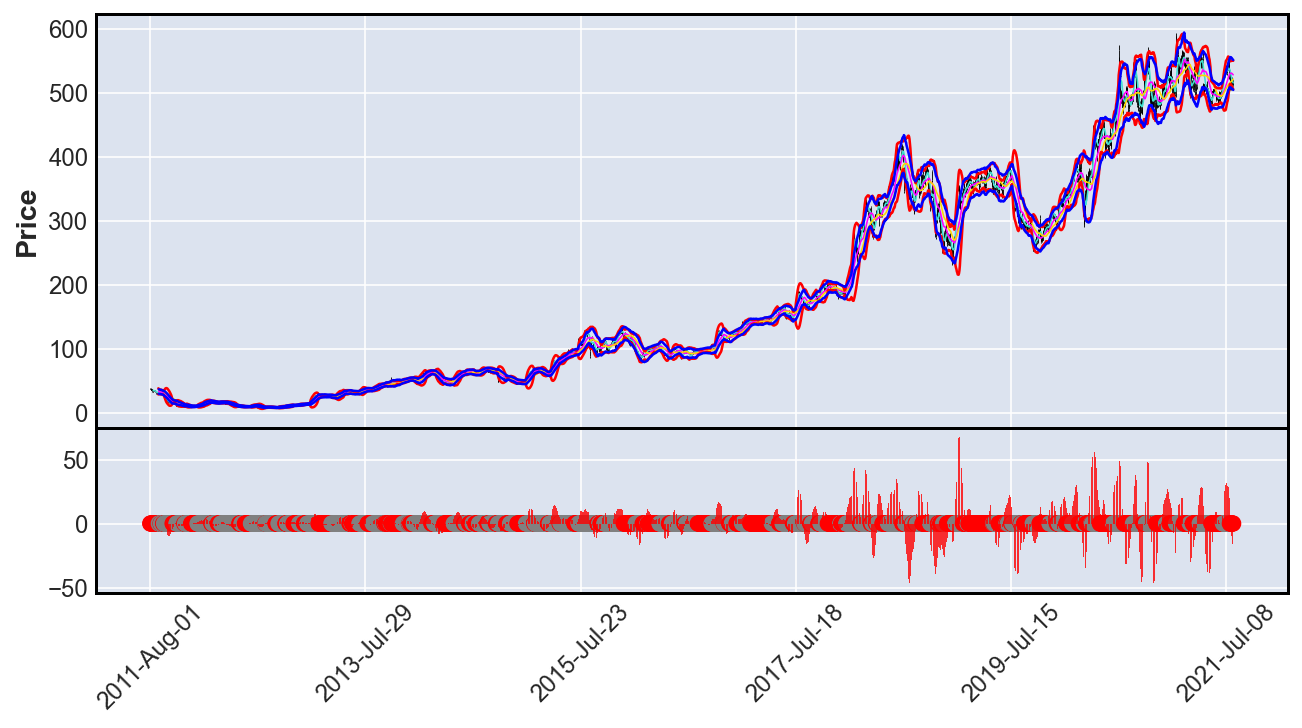

In [57]:
import panel as pn
from panel.interact import interact

pn.extension()

def figure_stock_d(stock):
    apds = [mpf.make_addplot(ticker_dict_1d[stock]['value'], panel=1, type='bar', color=colors_d, alpha=0.8, secondary_y=False),
            mpf.make_addplot([0] * len(ticker_dict_1d[stock]), panel=1, type='scatter', marker='o', markersize=50, color=['gray' if s else 'red' for s in ticker_dict_1d[stock]['squeeze_off']], secondary_y=False),
            mpf.make_addplot(ticker_dict_1d[stock][['upper_BB']], color = 'red'),
            mpf.make_addplot(ticker_dict_1d[stock][['lower_BB']], color = 'red'),
            mpf.make_addplot(ticker_dict_1d[stock][['upper_KC']], color = 'blue'),
            mpf.make_addplot(ticker_dict_1d[stock][['lower_KC']], color = 'blue')]

    # plot ohcl with subplots
    fig, axes = mpf.plot(ohcl_d[stock], 
              volume_panel = 2,
              figratio=(2,1),
              figscale=1,
              mav = (8,21,34),
              type='candle', 
              addplot=apds,
              returnfig=True)
    return pn.pane.Matplotlib(fig, tight=True)

ticker = daily_data["ticker"].unique()
interact(figure_stock_d, stock=ticker)